In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

!pip install fanalysis
from fanalysis.mca import MCA
!pip install scikit-plot

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report, confusion_matrix, plot_precision_recall_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder

import math

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 56 kB 2.5 MB/s 
Mounted at /content/drive


In [3]:
#import warnings
#warnings.filterwarnings("ignore")

In [4]:
# option d'affichage des résultats
pd.set_option("display.max_row",100)
pd.set_option("display.max_columns",100)

In [5]:

#colonnes_louis=["IDENT","Top_mon","predic_mon_top","prob_mon_top","SommeDeMONTANT_NUM","CLASSE_NN_L"]
colonnes_louis=["IDENT","predic_mon_top","prob_mon_top","Top_mon","SommeDeMONTANT_NUM","CLASSE_NN_L"]

tableau_louis = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/result_with_iden_monant_louis.csv", sep= ";", header = 0, names=colonnes_louis, low_memory=False, dtype=str )#, dtype='Int64')


In [6]:
tableau_louis

,IDENT,predic_mon_top,prob_mon_top,Top_mon,SommeDeMONTANT_NUM,CLASSE_NN_L
0,0010384998,0.0000645,0,0,30,1
1,0010263880,0.0000734,0,0,20,1
2,0010385708,0.000156075,0,0,10,1
3,0010387161,0.000238001,0,0,10,1
4,0010378424,0.000247538,0,0,20,1
...,...,...,...,...,...,...
99291,0010214718,0.967682779,1,1,100,20
99292,0010039046,0.967813313,1,1,50,20
99293,0010354251,0.969218254,1,1,150,20
99294,0010534524,0.973810554,1,1,50,20


In [7]:
colonnes_montant = ["DEDUPLI", "IDENT", "SommeDeMONTANT_NUM", "Flag_Top_Montant", "NovosScore_Vingtile"]

data_montant_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/DONS_FDF_N_TODAY_1ers_gestes_REF_MD.txt", sep=";", header = 0, low_memory=False, dtype=str) #, dtype=str )#, dtype='Int64')

data_montant_orig.iloc[:,2]=data_montant_orig.iloc[:,2].str.replace(",",".")

data_montant_orig.columns =colonnes_montant
data_montant_orig["SommeDeMONTANT_NUM"]=data_montant_orig["SommeDeMONTANT_NUM"].astype(float)

In [8]:
data_montant_orig

,DEDUPLI,IDENT,SommeDeMONTANT_NUM,Flag_Top_Montant,NovosScore_Vingtile
0,04427107,0010539054,0.01,2,13
1,04203221,0010355753,0.20,2,03
2,04272422,0010410598,0.50,2,09
3,04275153,0010412626,1.00,2,04
4,04266532,0010406043,1.00,2,07
...,...,...,...,...,...
99291,04419716,0010534197,100004.70,1,19
99292,04419717,0010534198,100004.70,1,20
99293,04092647,0010252975,125000.00,1,20
99294,04240338,0010385192,148000.00,1,10


In [9]:
# les noms des variables

colonnes =(["IDENT", "TypeHabi", "GeoFaz_Scl", "GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Anciennete",
            "Logement_prix_m2", "Mediane_RFR", "Sexe", "Prenom_Phase_scl_H", "Prenom_Phase_scl_F",
            "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Age_H", "Age_F", "Affinite_1", "Affinite_2",
            "Prenom_effectif", "Potentiel_prenom", "Onoma-Phase_Scl", "Onoma-Phase_CL", "Top_mon"])

In [10]:
#data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/sans_8_new_my_data_FDFTOT21.txt", delim_whitespace="\t", header = None, names=colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data = data_orig.copy()
data

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL,Top_mon
0,0010000001,02,81,08,91,09,06,21,21,01,71,41,07,04,12,04,20,02,02,01,51,05,1
1,0010000006,01,75,07,43,04,06,06,13,02,71,64,07,06,12,09,04,12,04,13,12,01,1
2,0010000011,01,76,07,43,04,06,06,16,03,54,81,05,08,07,12,06,06,04,18,36,03,2
3,0010000013,03,75,07,43,04,04,06,13,01,71,36,07,03,12,11,11,19,04,06,21,02,1
4,0010000015,02,33,03,44,04,06,07,12,01,71,42,07,04,12,05,14,03,03,01,14,01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192175,0370109343,01,64,06,82,08,05,16,17,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1192176,0370109344,03,61,06,64,06,06,14,01,04,44,81,04,08,05,12,01,05,01,03,54,05,NaN
1192177,0370109345,02,13,01,42,04,07,07,15,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1192178,0370109346,02,31,03,82,08,08,16,19,02,71,45,07,04,12,03,02,02,03,01,44,04,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192180 entries, 0 to 1192179
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   IDENT               1192180 non-null  object
 1   TypeHabi            1192180 non-null  object
 2   GeoFaz_Scl          1192180 non-null  object
 3   GeoFaz_cl           1192180 non-null  object
 4   ImmoFaz_Scl         1192180 non-null  object
 5   ImmoFaz_cl          1192180 non-null  object
 6   Anciennete          1192180 non-null  object
 7   Logement_prix_m2    1192180 non-null  object
 8   Mediane_RFR         1192180 non-null  object
 9   Sexe                1192180 non-null  object
 10  Prenom_Phase_scl_H  1192180 non-null  object
 11  Prenom_Phase_scl_F  1192180 non-null  object
 12  Prenom_Phase_cl_H   1192180 non-null  object
 13  Prenom_Phase_cl_F   1192180 non-null  object
 14  Age_H               1192180 non-null  object
 15  Age_F               1192180 non-

In [12]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    colonnes = data2.columns
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff

# sélection des corrélations les plus importantes
def variables_corr(tableau_corr, seuil):
    colonnes = tableau_corr.columns
    val_temp = 0 
    variables_corr_pos=[] ; variables_corr_pos_val=[]
    variables_corr_neg=[] ; variables_corr_neg_val=[]
    for i in range(tableau_corr.shape[0]):  
        for j in range(tableau_corr.shape[0]):
            if i<j: #i!=j:
                if (tableau_corr.iloc[i,j] > seuil):
                    variables_corr_pos.append(colonnes[j])
                    variables_corr_pos_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

                if (tableau_corr.iloc[i,j] <-seuil):
                    variables_corr_neg.append(colonnes[j])
                    variables_corr_neg_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

        if (len(variables_corr_pos) > 0) | (len(variables_corr_neg) >0) :
            print("variable : ", colonnes[i])
            if len(variables_corr_pos) > 0:    
                print("corr pos", variables_corr_pos)
                print("corr pos", variables_corr_pos_val)
                val_temp += 1

            if len(variables_corr_neg) >0:  
                print("corr neg", variables_corr_neg)
                print("corr neg", variables_corr_neg_val)
                val_temp += 1
            print("")
        variables_corr_pos = variables_corr_pos*0
        variables_corr_neg = variables_corr_pos*0

        variables_corr_pos_val = variables_corr_pos_val*0
        variables_corr_neg_val = variables_corr_pos_val*0
    if val_temp == 0:
        print("IL N'Y A PAS DE CORRELATION ENTRE LES VARIABLES PAR RAPPORT AU SEUIL PRIS")
        

def evaluation(model, X_train, y_train, X_test, y_test, scoring, plot):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("test set : ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred)) 
    print("train set : ")
    print(confusion_matrix(y_train, model.predict(X_train)))  
    print(classification_report(y_train, model.predict(X_train) ))

    if plot == True:
        N, train_score, val_score = learning_curve(model, X_train, y_train, shuffle=True, cv = 4, scoring = scoring, train_sizes = np.linspace(0.1, 1, 6) )

        plt.figure(figsize = (10,6))
        plt.plot(N, train_score.mean(axis=1), label ="train_score")
        plt.plot(N, val_score.mean(axis=1), label ="cross_validation_score")
        plt.legend()
    else :
        print("GRAPHIQUE NON DEMANDE")

# Comme il n'y a pas de valeurs manquantes (à la place il y a un nombre), le seul traitement qu'on fait c'est tranformer
# le type de variable (les variables continues deviennent qualitatives)
def data_processing(df):
    """ 
    for i in range(0,len(df.columns)):    
        df[df.columns[i]].fillna(100.0, inplace=True) #On remplace les données manquantes par 100
    for i in range(0,len(df.columns)):
        print(df[df.columns[i]].value_counts(dropna=False))    
    """
    
   #Transformation de toutes les variables en facteurs         
    for i in range(0,len(df.columns)):
        df[df.columns[i]] = df[df.columns[i]].astype('category')
    return df.to_numpy() #.as_matrix()


def vingtiles(model, data_orig, affichage, save, path): # data_orig est une variables locale (peut être différente au df d'origine)
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1

    # predict sur tous les individus (avec et sans classe Top_mon)
    tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])
    df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    #df_tous
    
    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #df_tous
    print(df_tous)
    
    #vérification
    print(df_tous['PROBA'].value_counts())

    # vingtiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    #print(df_temp)

    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    #print(df_tous)

    # création de la dernière colonne CLASSE et son remplissage
    index_20_ord = pd.DataFrame(np.unique(df_tous["TRANCHES"])) 
    df_tous["CLASSE"]=df_tous["TRANCHES"].copy()
    ind_val=1
    for kk in range(20):
        df_tous["CLASSE"][df_tous["CLASSE"]== index_20_ord.iloc[kk,0] ] = str(ind_val) 
        ind_val+=1
    print(df_tous)   

    # pour la colonne Top_mon : changement de type de variable et remplissage des valeurs (s'il le faut)
    data_temp_t = data_orig.copy()
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(1.0,'1')
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(2.0,'2')
    data_all_complet_class = data_temp_t #data_temp_t.fillna('2')
    #data_all_complet_class

    # jointure
    ident_class_tous = data_all_complet_class[["IDENT","Top_mon"]]
    tableau_resultats = pd.merge(df_tous,ident_class_tous)
    #tableau_resultats
    df_tous = pd.merge(df_tous, ident_class_tous)


    # tranches finales
    tab_cross_temp = pd.crosstab(tableau_resultats["TRANCHES"],tableau_resultats["Top_mon"])
    #print(tab_cross_temp); print("-----------------------")

    # création d'une colonne TOTAL
    tab_cross_temp["TOTAL"]=tab_cross_temp["1"]+tab_cross_temp["2"]
    
    # affichage
    if affichage ==True:        
        print(tab_cross_temp)

    # création du tableau final en éliminant la colonne 2
    #tab_pour_excel = tab_cross_temp.drop(["2"], axis=1)

    # si on ne veut pas éliminer la colonne 2
    tab_pour_excel =  tab_cross_temp
    
    # enregistrement sous Excel
    if save == True:
        tab_pour_excel.to_excel(path)

    return  df_tous


def tableau_5_montant(df_tous, data_montant_orig, affichage, save, path):
    # tableau avec les deux variables qui nous intéressent
    ident_et_montant = data_montant_orig[["IDENT","SommeDeMONTANT_NUM"]]

    # jointure
    tableau_resultats_et_montant = pd.merge(df_tous,ident_et_montant)
    #print(tableau_resultats_et_montant) 

    # on élimine toutes les sommes supérieur à 5000 €
    tableau_resultats_et_montant = tableau_resultats_et_montant[tableau_resultats_et_montant["SommeDeMONTANT_NUM"] <= 5000]
    print(tableau_resultats_et_montant) 
    #print(tableau_resultats_et_montant["TRANCHES"].value_counts())
    #print(pd.DataFrame(np.unique(tableau_resultats_et_montant["TRANCHES"])))

    # index
    index_temp = pd.DataFrame(np.unique(tableau_resultats_et_montant["TRANCHES"])) 

    # création du tableau qui contiendra les résultats finaux
    tableau_resultats_finaux = pd.DataFrame(columns=["TRANCHES","Moyen_Somme","TOTAL"],index=range(20))
    tableau_resultats_finaux["TRANCHES"] = index_temp

    # remplissage du tableau final
    for k in range(20):
        tableau_resultats_finaux.iloc[k,1] = tableau_resultats_et_montant[tableau_resultats_et_montant["TRANCHES"]==index_temp.iloc[k,0]]["SommeDeMONTANT_NUM"].mean()
        tableau_resultats_finaux.iloc[k,2] = (tableau_resultats_et_montant["TRANCHES"]==index_temp.iloc[k,0]).sum()
    
    # affichage
    if affichage:        
        print(tableau_resultats_finaux)
    
    # enregistrement sous Excel
    if save:
        tableau_resultats_finaux.to_excel(path)


def vingtiles_ind_sans_target(model, data_orig, affichage, save, path):
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1

    # predict sur tous les individus (avec et sans classe IFI+)
    tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])
    df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    #df_tous
    
    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #df_tous
    print(df_tous)
    
    #vérification
    print(df_tous['PROBA'].value_counts())

    # quarantiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    print(df_temp)

    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    print(df_tous)
    print(df_tous["TRANCHES"].value_counts(ascending = True))

    # GERE L'ORDRE
    patra = np.unique(df_tous.iloc[:,2], return_counts=True)
    df_tranches_sans_target = pd.DataFrame([patra[0],patra[1]]).T
    df_tranches_sans_target.columns=["TRANCHES","COUNTS"]

    # affichage
    if affichage ==True:        
        print(df_tranches_sans_target)
    
    # enregistrement sous Excel
    if save == True:
        df_tranches_sans_target.to_excel(path)
    

# élimination des variables trop corrélées (choix manuel)
def elimination_val_corr(data):
    data = data.drop(columns=[""])
    return data
          


In [13]:
def vingtiles_louis(tableau_proba_louis, data_orig, affichage, save, path): # data_orig est une variables locale (peut être différente au df d'origine)
    # model éliminé
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1

    # predict sur tous les individus (avec et sans classe Top_mon)
    #tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])

    #df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    df_tous = pd.DataFrame({'IDENT': tableau_proba_louis["IDENT"] , 'PROBA':tableau_louis["predic_mon_top"].astype(float) })
    #df_tous
    
    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #print(df_tous)
    
    #vérification
    print(df_tous['PROBA'].value_counts())

    # vingtiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    #print(df_temp)

    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    #print(df_tous)

    # création de la dernière colonne CLASSE et son remplissage
    index_20_ord = pd.DataFrame(np.unique(df_tous["TRANCHES"])) 
    df_tous["CLASSE"]=df_tous["TRANCHES"].copy()
    ind_val=1
    for kk in range(20):
        df_tous["CLASSE"][df_tous["CLASSE"]== index_20_ord.iloc[kk,0] ] = str(ind_val) 
        ind_val+=1
    #print(df_tous)   

    # pour la colonne Top_mon : changement de type de variable et remplissage des valeurs (s'il le faut)
    data_temp_t = data_orig.copy()
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(1.0,'1')
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(2.0,'2')
    data_all_complet_class = data_temp_t #data_temp_t.fillna('2')
    #data_all_complet_class

    # jointure
    ident_class_tous = data_all_complet_class[["IDENT","Top_mon"]]
    tableau_resultats = pd.merge(df_tous,ident_class_tous)
    #tableau_resultats
    df_tous = pd.merge(df_tous, ident_class_tous)


    # tranches finales
    tab_cross_temp = pd.crosstab(tableau_resultats["TRANCHES"],tableau_resultats["Top_mon"])
    #print(tab_cross_temp); print("-----------------------")

    # création d'une colonne TOTAL
    tab_cross_temp["TOTAL"]=tab_cross_temp["1"]+tab_cross_temp["2"]
    
    # affichage
    if affichage ==True:        
        print(tab_cross_temp)

    # création du tableau final en éliminant la colonne 2
    #tab_pour_excel = tab_cross_temp.drop(["2"], axis=1)

    # si on ne veut pas éliminer la colonne 2
    tab_pour_excel =  tab_cross_temp
    
    # enregistrement sous Excel
    if save == True:
        tab_pour_excel.to_excel(path)

    return  df_tous



In [14]:
#################################################################################################
#                       SANS VARIABLES CORR ET ENCODAGE DUMMIES
#################################################################################################

In [15]:
# test predict individus sans classe
data = data_orig.copy()

# on élimine les variables dons
data=data.drop(["GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Prenom_Phase_cl_H", "Prenom_Phase_cl_F",
                "Onoma-Phase_Scl", "Onoma-Phase_CL"],axis=1)

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe Top_mon
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [16]:
#######################################################################################################
#######################################################################################################

In [17]:

final_model_LogisticRegression = LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced")
evaluation(final_model_LogisticRegression, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False )

final_model_AdaBoost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight="balanced", criterion="gini",max_depth=2),n_estimators = 20 , random_state=0 )  
evaluation(final_model_AdaBoost, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall" , plot =False)

final_model_RandomForestClassifier = RandomForestClassifier(class_weight="balanced", criterion="gini", max_depth=3, max_features=25, n_estimators = 100, random_state=0) 
evaluation(final_model_RandomForestClassifier, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)

final_model_ExtraTreesClassifier = ExtraTreesClassifier( criterion="entropy", max_depth=3, max_features=30, n_estimators=50 , class_weight="balanced", random_state=0)  
evaluation(final_model_ExtraTreesClassifier, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


test set : 
[[3075 2256]
 [5481 9048]]
              precision    recall  f1-score   support

           1       0.36      0.58      0.44      5331
           2       0.80      0.62      0.70     14529

    accuracy                           0.61     19860
   macro avg       0.58      0.60      0.57     19860
weighted avg       0.68      0.61      0.63     19860

train set : 
[[12174  9223]
 [21387 36652]]
              precision    recall  f1-score   support

           1       0.36      0.57      0.44     21397
           2       0.80      0.63      0.71     58039

    accuracy                           0.61     79436
   macro avg       0.58      0.60      0.57     79436
weighted avg       0.68      0.61      0.63     79436

GRAPHIQUE NON DEMANDE
test set : 
[[2826 2505]
 [4948 9581]]
              precision    recall  f1-score   support

           1       0.36      0.53      0.43      5331
           2       0.79      0.66      0.72     14529

    accuracy                          

In [18]:

num_var_max = data.shape[1] - 1
num_var_max

270

In [19]:
# fonction qui va diviser et calculer les coordonnées des individus 
def transform_to_coord(data):
    coord_part = 0
    coord = acm.transform(data.iloc[0:30000,1:num_var_max].values)
    k=30000
    nb_part = round(data.shape[0]/k)
    for i in range(1, nb_part):
        coord_part=acm.transform(data.iloc[i*k:(i+1)*k,1:num_var_max].values)
        coord=np.concatenate((coord, coord_part))

    coord_part = acm.transform(data.iloc[nb_part*k: ,1:num_var_max].values )
    coord=np.concatenate((coord, coord_part))
    return coord

In [20]:
#instanciation
acm = MCA(var_labels = data.columns[1:num_var_max], n_components=55)  # paramètres index manquante (gérer après)
#apprentissage 
"ne pas utiliser fit_tranform car le datset est trop grand "
dim_temporaire = data_orig[(data_orig.isnull()).sum(axis=1) == 0].shape[0]
acm.fit(data.iloc[:dim_temporaire,1:num_var_max].values)

# tranformation du dataset
coord = transform_to_coord(data)

In [21]:
## ATTENTION
# élimination des individus n'ayant pas de valeur pour la variable Top_mon
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]
coord_sans_nan = coord[(data.isnull()).sum(axis=1) == 0] # coordonnées

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int) # essayer avec int64

# création
def creation_df_temp(data_sans_nan, coord_sans_nan):
    dfff = pd.DataFrame()
    dfff["IDENT"] = data_sans_nan.iloc[:,0]
    for i in range(coord_sans_nan.shape[1] ): #avant 10
        dfff[str(i)]=coord_sans_nan[:,i]
    dfff["Top_mon"] = data_sans_nan.iloc[:,data_sans_nan.shape[1]-1].astype(int)
    return dfff
# stockage
data_coord_nan = creation_df_temp(data_sans_nan, coord_sans_nan)
#data_coord_nan.info()

# maintien des individus  n'ayant pas de valeur pour la variable Top_mon

data_avec_nan = data
coord_avec_nan = coord # coordonnées
def creation_df_temp_2(data_avec_nan, coord_avec_nan):
    dfff = pd.DataFrame()
    dfff["IDENT"] = data_avec_nan.iloc[:,0]
    for i in range(coord_avec_nan.shape[1]): # avant 10
        dfff[str(i)]=coord_avec_nan[:,i]

    dfff["Top_mon"] = data_avec_nan.iloc[:,data_avec_nan.shape[1]-1] #.astype(int)

    dfff["Top_mon"] = dfff["Top_mon"].replace(1.0, '1')
    dfff["Top_mon"] = dfff["Top_mon"].replace(2.0,'2')
    return dfff

#stockage
data_coord_avec_nan = creation_df_temp_2(data_avec_nan, coord_avec_nan)
#data_coord_avec_nan.info()

In [22]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV

import imblearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
#data_non_corr = elimination_val_corr(data)
#nb_var = data_non_corr.shape[1] - 1
nb_var_acm = data_coord_nan.shape[1] - 1

train_set_acm, test_set_acm = train_test_split(data_coord_nan, test_size = 0.2, random_state=0) # , stratify =data_coord_nan["IFI+"] )

train_X_s_acm = (train_set_acm.iloc[:,1:nb_var_acm]).to_numpy()
train_Y_s_acm = np.asanyarray(train_set_acm.iloc[:,nb_var_acm])

test_X_s_acm = (test_set_acm.iloc[:,1:nb_var_acm]).to_numpy()
test_Y_s_acm = np.asanyarray(test_set_acm.iloc[:,nb_var_acm])

# comme les résulats sont en overfitting :
# Résultat du traitement sur le train set (under-sampling et over-sampling)
#abc_test = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/sans_val_corr_spad_under_over_sampling.txt", delim_whitespace="\t", header = None, low_memory=False, dtype="Int64" ) #, dtype='Int64')
#abc_np = abc_test.to_numpy(dtype="Int64")

#X_resampled = abc_np[:,:-1]
#y_resampled = abc_np[:, abc_np.shape[1] -1 ]

In [24]:
# dimension du train set
print("Sans aucun traitement sur le train set : " , np.unique(train_Y_s_acm, return_counts=True))

# diminution des données
t2 = TomekLinks(random_state=0)
X_resampled, y_resampled = t2.fit_resample(train_X_s_acm[:,:nb_var_acm] , train_Y_s_acm )
print("Après under-sampling : ", np.unique(y_resampled, return_counts=True ))

# augmentation des données
tl = SMOTE(random_state=0)
X_resampled, y_resampled = tl.fit_resample(X_resampled, y_resampled )
print("Après over-smapling : " , np.unique(y_resampled, return_counts=True ))

'''
# enregistrement du nouveau train set car le traitement du under-sampling prendre du temps 
pd.DataFrame(np.concatenate((X_resampled, y_resampled.reshape((y_resampled.shape[0],1)) ),
                            axis=1)).to_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/val_all_spad_under_over_sampling.txt",
                                            sep=" ", index =False , header = False )
'''

Sans aucun traitement sur le train set :  (array([1, 2]), array([21397, 58039]))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Après under-sampling :  (array([1, 2]), array([21397, 50960]))
Après over-smapling :  (array([1, 2]), array([50960, 50960]))


'\n# enregistrement du nouveau train set car le traitement du under-sampling prendre du temps \npd.DataFrame(np.concatenate((X_resampled, y_resampled.reshape((y_resampled.shape[0],1)) ),\n                            axis=1)).to_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/val_all_spad_under_over_sampling.txt",\n                                            sep=" ", index =False , header = False )\n'

In [25]:
final_model_ADL = LinearDiscriminantAnalysis()  # la valeur par defaut de la tolérence donne le même résultat que tol=1e-5
evaluation(final_model_ADL, X_resampled, y_resampled, test_X_s_acm, test_Y_s_acm, scoring = "recall", plot=False)

test set : 
[[3201 2130]
 [5946 8583]]
              precision    recall  f1-score   support

           1       0.35      0.60      0.44      5331
           2       0.80      0.59      0.68     14529

    accuracy                           0.59     19860
   macro avg       0.58      0.60      0.56     19860
weighted avg       0.68      0.59      0.62     19860

train set : 
[[30389 20571]
 [19920 31040]]
              precision    recall  f1-score   support

           1       0.60      0.60      0.60     50960
           2       0.60      0.61      0.61     50960

    accuracy                           0.60    101920
   macro avg       0.60      0.60      0.60    101920
weighted avg       0.60      0.60      0.60    101920

GRAPHIQUE NON DEMANDE


In [26]:
final_model_ADQ = QuadraticDiscriminantAnalysis()  # la valeur par defaut de la tolérence donne le même résultat que tol=1e-5
evaluation(final_model_ADQ, X_resampled, y_resampled, test_X_s_acm, test_Y_s_acm, scoring = "recall", plot=False)

test set : 
[[2813 2518]
 [5149 9380]]
              precision    recall  f1-score   support

           1       0.35      0.53      0.42      5331
           2       0.79      0.65      0.71     14529

    accuracy                           0.61     19860
   macro avg       0.57      0.59      0.57     19860
weighted avg       0.67      0.61      0.63     19860

train set : 
[[27096 23864]
 [17200 33760]]
              precision    recall  f1-score   support

           1       0.61      0.53      0.57     50960
           2       0.59      0.66      0.62     50960

    accuracy                           0.60    101920
   macro avg       0.60      0.60      0.60    101920
weighted avg       0.60      0.60      0.60    101920

GRAPHIQUE NON DEMANDE


In [27]:
model_17_cw_ACM = LogisticRegression(random_state =0, C=3,penalty="l1" , solver="liblinear", max_iter= 10000, class_weight="balanced")
evaluation(model_17_cw_ACM, train_X_s_acm, train_Y_s_acm, test_X_s_acm, test_Y_s_acm, scoring="recall", plot=False )

test set : 
[[3129 2202]
 [5790 8739]]
              precision    recall  f1-score   support

           1       0.35      0.59      0.44      5331
           2       0.80      0.60      0.69     14529

    accuracy                           0.60     19860
   macro avg       0.57      0.59      0.56     19860
weighted avg       0.68      0.60      0.62     19860

train set : 
[[12312  9085]
 [22808 35231]]
              precision    recall  f1-score   support

           1       0.35      0.58      0.44     21397
           2       0.79      0.61      0.69     58039

    accuracy                           0.60     79436
   macro avg       0.57      0.59      0.56     79436
weighted avg       0.68      0.60      0.62     79436

GRAPHIQUE NON DEMANDE


In [28]:
#######################################################################################################
#######################################################################################################

In [29]:
vingtiles_tableau_LR = vingtiles(model =final_model_LogisticRegression, data_orig = data, affichage=True, save=False, path = " ")
vingtiles_tableau_LR.columns = ["IDENT","PROBA","TRANCHES","CLASSE_LR","Top_mon"]

vingtiles_tableau_Adaboost = vingtiles(model =final_model_AdaBoost, data_orig = data, affichage=True, save=False, path = " ")
vingtiles_tableau_Adaboost.columns = ["IDENT","PROBA","TRANCHES","CLASSE_Adaboost","Top_mon"]

vingtiles_tableau_RandomForestClassifier = vingtiles(model =final_model_RandomForestClassifier, data_orig = data, affichage=True, save=False, path = " ")
vingtiles_tableau_RandomForestClassifier.columns = ["IDENT","PROBA","TRANCHES","CLASSE_RandomF","Top_mon"]

vingtiles_tableau_ExtraTreesClassifier = vingtiles(model =final_model_ExtraTreesClassifier, data_orig = data, affichage=True, save=False, path = " ")
vingtiles_tableau_ExtraTreesClassifier.columns = ["IDENT","PROBA","TRANCHES","CLASSE_ExtraT","Top_mon"]

vingtiles_tableau_ADL_55 = vingtiles(model =final_model_ADL, data_orig = data_coord_nan, affichage=True, save=False, path = " ")
vingtiles_tableau_ADL_55.columns = ["IDENT","PROBA","TRANCHES","CLASSE_ADL_55","Top_mon"]

vingtiles_tableau_ADQ_55 = vingtiles(model =final_model_ADQ, data_orig = data_coord_nan, affichage=True, save=False, path = " ")
vingtiles_tableau_ADQ_55.columns = ["IDENT","PROBA","TRANCHES","CLASSE_ADQ_55","Top_mon"]

vingtiles_tableau_louis = vingtiles_louis(tableau_louis, data_orig= data, affichage=True, save=False, path = " ")
vingtiles_tableau_louis.columns = ["IDENT","PROBA","TRANCHES","CLASSE_NN_L","Top_mon"]


            IDENT     PROBA
29258  0010349235  0.212550
87780  0010522654  0.215477
36430  0010361036  0.216564
17995  0010281361  0.216926
6279   0010253033  0.218817
...           ...       ...
83536  0010503920  0.892491
60221  0010392936  0.895586
82851  0010500476  0.897917
83624  0010504178  0.897917
77220  0010412631  0.897917

[99296 rows x 2 columns]
0.887968    49
0.736208    28
0.654329    24
0.798384    19
0.734046    19
            ..
0.650367     1
0.428812     1
0.425654     1
0.319385     1
0.469140     1
Name: PROBA, Length: 96552, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA        TRANCHES CLASSE
29258  0010349235  0.212550  (0.212, 0.317]      1
87780  0010522654  0.215477  (0.212, 0.317]      1
36430  0010361036  0.216564  (0.212, 0.317]      1
17995  0010281361  0.216926  (0.212, 0.317]      1
6279   0010253033  0.218817  (0.212, 0.317]      1
...           ...       ...             ...    ...
83536  0010503920  0.892491    (0.7, 0.898]     20
60221  0010392936  0.895586    (0.7, 0.898]     20
82851  0010500476  0.897917    (0.7, 0.898]     20
83624  0010504178  0.897917    (0.7, 0.898]     20
77220  0010412631  0.897917    (0.7, 0.898]     20

[99296 rows x 4 columns]
Top_mon            1     2  TOTAL
TRANCHES                         
(0.212, 0.317]   647  4318   4965
(0.317, 0.345]   757  4208   4965
(0.345, 0.367]   805  4160   4965
(0.367, 0.386]   923  4042   4965
(0.386, 0.402]   965  3999   4964
(0.402, 0.419]   957  4008   4965
(0.419, 0.433]  1041  3924   4965
(0.433, 0.448]  1133  3832   4965
(0.448, 0.463]  1139  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA                       TRANCHES CLASSE
63493  0010397061  0.135818  (0.13570000000000002, 0.4908]      1
18843  0010291953  0.136391  (0.13570000000000002, 0.4908]      1
10385  0010257272  0.136550  (0.13570000000000002, 0.4908]      1
62181  0010395560  0.136550  (0.13570000000000002, 0.4908]      1
11441  0010258353  0.136550  (0.13570000000000002, 0.4908]      1
...           ...       ...                            ...    ...
99283  0010539458  0.532344               (0.5119, 0.5341]     20
88492  0010524610  0.532355               (0.5119, 0.5341]     20
83980  0010505638  0.532984               (0.5119, 0.5341]     20
79062  0010415013  0.533166               (0.5119, 0.5341]     20
93101  0010530839  0.534106               (0.5119, 0.5341]     20

[99296 rows x 4 columns]
Top_mon                           1     2  TOTAL
TRANCHES                                        
(0.13570000000000002, 0.4908]   656  4331   4987
(0.4908, 0.4919]                788

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA                     TRANCHES CLASSE
67904  0010401663  0.407182  (0.40599999999999997, 0.43]      1
53738  0010379725  0.408820  (0.40599999999999997, 0.43]      1
21093  0010337388  0.408885  (0.40599999999999997, 0.43]      1
42914  0010368050  0.409773  (0.40599999999999997, 0.43]      1
93208  0010530978  0.410760  (0.40599999999999997, 0.43]      1
...           ...       ...                          ...    ...
88310  0010524335  0.694018               (0.585, 0.694]     20
51004  0010376561  0.694018               (0.585, 0.694]     20
3728   0010049725  0.694018               (0.585, 0.694]     20
54667  0010381112  0.694018               (0.585, 0.694]     20
2071   0010027021  0.694018               (0.585, 0.694]     20

[99296 rows x 4 columns]
Top_mon                         1     2  TOTAL
TRANCHES                                      
(0.40599999999999997, 0.43]   733  4238   4971
(0.43, 0.435]                 871  4121   4992
(0.435, 0.445]    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA        TRANCHES CLASSE
14323  0010261341  0.402797  (0.402, 0.422]      1
21707  0010338071  0.402948  (0.402, 0.422]      1
61080  0010394340  0.402948  (0.402, 0.422]      1
35477  0010360000  0.402948  (0.402, 0.422]      1
23635  0010340220  0.402948  (0.402, 0.422]      1
...           ...       ...             ...    ...
50923  0010376412  0.718302  (0.596, 0.718]     20
75590  0010410331  0.718302  (0.596, 0.718]     20
2070   0010027016  0.718302  (0.596, 0.718]     20
98902  0010538813  0.718302  (0.596, 0.718]     20
15264  0010262550  0.718302  (0.596, 0.718]     20

[99296 rows x 4 columns]
Top_mon            1     2  TOTAL
TRANCHES                         
(0.402, 0.422]   876  4575   5451
(0.422, 0.427]   767  3714   4481
(0.427, 0.442]   908  4058   4966
(0.442, 0.447]  1346  6148   7494
(0.447, 0.449]   574  1863   2437
(0.449, 0.456]  1082  3887   4969
(0.456, 0.46]   1203  4345   5548
(0.46, 0.468]   1104  3423   4527
(0.468, 0.481]  1173  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA        TRANCHES CLASSE
85390  0010519316  0.124555   (0.124, 0.29]      1
73678  0010408023  0.125987   (0.124, 0.29]      1
11693  0010258609  0.136132   (0.124, 0.29]      1
29796  0010349953  0.139655   (0.124, 0.29]      1
8403   0010255206  0.140556   (0.124, 0.29]      1
...           ...       ...             ...    ...
40909  0010365982  0.880916  (0.698, 0.885]     20
34660  0010359130  0.882359  (0.698, 0.885]     20
97287  0010537076  0.882359  (0.698, 0.885]     20
59942  0010392241  0.882359  (0.698, 0.885]     20
88332  0010524378  0.885281  (0.698, 0.885]     20

[99296 rows x 4 columns]
Top_mon            1     2  TOTAL
TRANCHES                         
(0.124, 0.29]    708  4257   4965
(0.29, 0.328]    813  4152   4965
(0.328, 0.355]   864  4101   4965
(0.355, 0.377]   915  4050   4965
(0.377, 0.398]  1007  3957   4964
(0.398, 0.417]  1004  3961   4965
(0.417, 0.434]  1066  3899   4965
(0.434, 0.452]  1089  3876   4965
(0.452, 0.469]  1154  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT          PROBA              TRANCHES CLASSE
16041  0010263606  1.503463e-101  (-0.0001, 2.543e-05]      1
39841  0010364732   3.278799e-96  (-0.0001, 2.543e-05]      1
54331  0010380748   2.775323e-84  (-0.0001, 2.543e-05]      1
61726  0010395046   2.346921e-68  (-0.0001, 2.543e-05]      1
24359  0010341301   1.175935e-63  (-0.0001, 2.543e-05]      1
...           ...            ...                   ...    ...
18360  0010286521   1.000000e+00         (0.9999, 1.0]     20
18445  0010289009   1.000000e+00         (0.9999, 1.0]     20
78020  0010413918   1.000000e+00         (0.9999, 1.0]     20
78521  0010414446   1.000000e+00         (0.9999, 1.0]     20
0      0010000001   1.000000e+00         (0.9999, 1.0]     20

[99296 rows x 4 columns]
Top_mon                    1     2  TOTAL
TRANCHES                                 
(-0.0001, 2.543e-05]     840  4125   4965
(2.543e-05, 0.0006313]   872  4093   4965
(0.0006313, 0.00356]     881  4084   4965
(0.00356, 0.01148]  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Top_mon                 1     2  TOTAL
TRANCHES                              
(-0.0009355, 0.201]   161  4804   4965
(0.201, 0.282]        253  4712   4965
(0.282, 0.337]        343  4622   4965
(0.337, 0.379]        437  4528   4965
(0.379, 0.413]        547  4417   4964
(0.413, 0.44]         703  4262   4965
(0.44, 0.463]         809  4156   4965
(0.463, 0.483]        934  4031   4965
(0.483, 0.501]       1062  3902   4964
(0.501, 0.518]       1207  3758   4965
(0.518, 0.534]       1321  3644   4965
(0.534, 0.551]       1381  3584   4965
(0.551, 0.569]       1467  3497   4964
(0.569, 0.589]       1570  3395   4965
(0.589, 0.612]       1799  3166   4965
(0.612, 0.639]       1969  2996   4965
(0.639, 0.673]       2145  2819   4964
(0.673, 0.718]       2386  2579   4965
(0.718, 0.786]       2802  2166   4968
(0.786, 0.978]       3432  1530   4962


In [30]:
# Constitution d'un tableau avec les vingtiles de chacune des méthodes répresentées par une colonne
from functools import reduce
TABLEAU=vingtiles_tableau_LR[["IDENT", "CLASSE_LR", "Top_mon"]].copy()

TABLEAU = reduce(lambda left,right: pd.merge(left,right,on='IDENT'), [ TABLEAU,
                    vingtiles_tableau_Adaboost[["IDENT","CLASSE_Adaboost"]],
                    vingtiles_tableau_RandomForestClassifier[["IDENT","CLASSE_RandomF"]],
                    vingtiles_tableau_ExtraTreesClassifier[["IDENT","CLASSE_ExtraT"]],
                    vingtiles_tableau_ADL_55[["IDENT", "CLASSE_ADL_55"]],
                    vingtiles_tableau_ADQ_55[["IDENT","CLASSE_ADQ_55"]],
                    vingtiles_tableau_louis[["IDENT","CLASSE_NN_L"]] ]) # Pour tableau_louis (on a fait un changement) tableau_louis[["IDENT","CLASSE_NN_L"]

TABLEAU

# enregistrement
#TABLEAU.to_excel("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/tableau_models_ident_class.xlsx")


,IDENT,CLASSE_LR,Top_mon,CLASSE_Adaboost,CLASSE_RandomF,CLASSE_ExtraT,CLASSE_ADL_55,CLASSE_ADQ_55,CLASSE_NN_L
0,0010349235,1,1,1,1,1,1,1,10
1,0010522654,1,2,1,1,1,1,1,11
2,0010361036,1,2,1,1,1,1,1,8
3,0010281361,1,1,1,1,1,1,1,17
4,0010253033,1,2,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...
99291,0010503920,20,1,20,20,20,20,20,20
99292,0010392936,20,2,20,20,20,20,20,20
99293,0010500476,20,2,20,20,20,20,20,20
99294,0010504178,20,2,20,20,20,20,20,20


In [31]:
# MODALITES DE CHACUNE DES VARIABLES ET LEURS %

def mod_pourcentage(df_test):  #df_test.iloc[:,1:-1]
    print("Format d'entrée : "+ "df_test.iloc[:,1:-1]")
    for ii in range(df_test.shape[1]):
        temp_ctt =df_test.iloc[:,ii].value_counts(dropna=False)
        temp_rest =pd.concat([temp_ctt,round(temp_ctt/df_test.shape[0]*100,2)], axis=1)
        temp_rest.columns = [[temp_ctt.name, "%"]]
        print(temp_rest); print("="*50)          

def mod_pourcentage_premiers(df_test, premiers_nombre):  #df_test.iloc[:,1:-1]
    print("Format d'entrée : "+ "df_test.iloc[:,1:-1]")
    for ii in range(df_test.shape[1]):
        temp_ctt =df_test.iloc[:,ii].value_counts(dropna=False)
        temp_rest =pd.concat([temp_ctt,round(temp_ctt/df_test.shape[0]*100,2)], axis=1)
        temp_rest.columns = [[temp_ctt.name, "%"]]
        print(temp_rest.iloc[0:premiers_nombre,:]); print("="*50)   

def mod_pourcentage_premiers_comparaison(df_test, df_test_2,premiers_nombre):  #df_test.iloc[:,1:-1]
    print("Format d'entrée : "+ "df_test.iloc[:,1:-1]")
    for ii in range(df_test.shape[1]):
        temp_ctt =df_test.iloc[:,ii].value_counts(dropna=False)
        temp_rest =pd.concat([temp_ctt,round(temp_ctt/df_test.shape[0]*100,2)], axis=1, ignore_index=True)
        temp_rest.columns = [[temp_ctt.name, "%"]]
        temp_rest["Index"] = temp_rest.index 
        print(temp_rest.columns[0])

        temp_ctt_2 =df_test_2.iloc[:,ii].value_counts(dropna=False)
        temp_rest_2 =pd.concat([temp_ctt_2,round(temp_ctt_2/df_test_2.shape[0]*100,2)], axis=1, ignore_index=True)
        temp_rest_2.columns = [[temp_ctt_2.name, "%"]]
        temp_rest_2["Index"] = temp_rest_2.index 

        if type(premiers_nombre) == int : 
            temp_resultat = pd.concat([temp_rest.iloc[0:premiers_nombre,:],temp_rest_2.iloc[0:premiers_nombre,:]], axis=1, ignore_index=True)
        elif premiers_nombre == "all":
            temp_resultat = pd.concat([temp_rest,temp_rest_2], axis=1, ignore_index=True)
        temp_resultat.columns = ["Nb_left","%", "Index", "Nb_right", "%", "Index"]

        print( temp_resultat ); print("="*50)           



In [32]:
#################################################### intersection ####################################################
def recherche_groupe_ind_intersect(TABLEAU):
    tab_compa_complet = TABLEAU.drop(["Top_mon"], axis=1)
    for j in range(1,tab_compa_complet.shape[1]):
        tab_compa_complet.iloc[:,j] = tab_compa_complet.iloc[:,j].astype(int)
        
    df_temp = tab_compa_complet[["CLASSE_LR","CLASSE_Adaboost","CLASSE_RandomF","CLASSE_ExtraT","CLASSE_ADL_55","CLASSE_ADQ_55","CLASSE_NN_L"]].sum(axis=1)
    df_temp.name="SOMME"
    tab_compa_complet= pd.concat([tab_compa_complet["IDENT"],df_temp], axis=1)

    return tab_compa_complet[tab_compa_complet["SOMME"]==140]


In [33]:
# TOP 1 et 2
recherche_groupe_ind_intersect(TABLEAU)

,IDENT,SOMME
94350,0010526003,140
94660,0010029366,140
94700,0010501742,140
94745,0010520400,140
94838,0010374226,140
...,...,...
99291,0010503920,140
99292,0010392936,140
99293,0010500476,140
99294,0010504178,140


In [34]:
# Top 1
TABLEAU_temp_1 = TABLEAU[TABLEAU["Top_mon"]=="1"]
recherche_groupe_ind_intersect(TABLEAU_temp_1)


,IDENT,SOMME
94350,0010526003,140
94660,0010029366,140
94700,0010501742,140
94745,0010520400,140
94955,0010395209,140
...,...,...
99288,0010411310,140
99289,0010260863,140
99290,0010263630,140
99291,0010503920,140


In [35]:
# CARACTERISTIQUES DES INDIVIDUS (Top_mon=1)
df_caract_inter = pd.merge(data_orig[data_orig["Top_mon"]=="1"], recherche_groupe_ind_intersect(TABLEAU_temp_1))
df_caract_inter

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL,Top_mon,SOMME
0,0010007961,01,73,07,51,05,07,20,20,03,51,81,05,08,10,12,18,12,05,15,11,01,1,140
1,0010022267,03,74,07,84,08,01,17,20,04,33,81,03,08,07,12,03,05,05,20,34,03,1,140
2,0010026672,01,73,07,51,05,06,20,20,04,51,81,05,08,08,12,09,15,05,18,12,01,1,140
3,0010026677,01,73,07,51,05,06,20,20,03,33,81,03,08,09,12,10,07,05,19,11,01,1,140
4,0010026714,01,73,07,51,05,05,20,20,01,71,64,07,06,12,10,14,11,05,14,17,01,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0010539035,01,72,07,51,05,06,20,20,05,71,81,07,08,12,12,21,21,06,21,61,06,1,140
930,0010539125,01,73,07,51,05,06,20,20,03,33,44,03,04,08,08,04,06,05,20,36,03,1,140
931,0010539129,01,73,07,51,05,06,20,20,01,71,42,07,04,12,04,02,02,04,04,42,04,1,140
932,0010539418,01,73,07,51,05,05,20,20,03,33,81,03,08,09,12,11,07,05,20,11,01,1,140


In [36]:
# POURCENTAGE DE TOP MONTANT
print("Top_mon 1 et 2 :", recherche_groupe_ind_intersect(TABLEAU).shape[0] )
print( "% Top_mon=1 :" ,round(recherche_groupe_ind_intersect(TABLEAU_temp_1).shape[0] / recherche_groupe_ind_intersect(TABLEAU).shape[0]*100 ,2))
print( "% Top_mon=2 :" ,100-round(recherche_groupe_ind_intersect(TABLEAU_temp_1).shape[0] / recherche_groupe_ind_intersect(TABLEAU).shape[0]*100 ,2))


Top_mon 1 et 2 : 1393
% Top_mon=1 : 67.05
% Top_mon=2 : 32.95


In [37]:
# MONTANT MOYEN DERNIER QUANTILE
df_abc = pd.merge(df_caract_inter, data_montant_orig)
print("montant moyen <=5000 : ", round(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]<=5000].mean(),2))
print("montant moyen >5000 : ", round(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].mean(),2))
print("montant moyen (tous) :", round(df_abc["SommeDeMONTANT_NUM"].mean(),2))

montant moyen <=5000 :  284.9
montant moyen >5000 :  21341.37
montant moyen (tous) : 848.51


In [38]:
# MODALITES DE CHACUNE DES VARIABLES ET LEURS %

mod_pourcentage(df_caract_inter.iloc[:,1:-1])
"""
df_test = df_caract_inter.iloc[:,1:-1]
for ii in range(df_test.shape[1]):
    temp_ctt =df_test.iloc[:,ii].value_counts(dropna=False)
    temp_rest =pd.concat([temp_ctt,round(temp_ctt/df_test.shape[0]*100,2)], axis=1)
    temp_rest.columns = [[temp_ctt.name, "%"]]
    print(temp_rest); print("="*50)
"""

Format d'entrée : df_test.iloc[:,1:-1]
   TypeHabi      %
01      742  79.44
03      145  15.52
02       47   5.03
   GeoFaz_Scl      %
73        810  86.72
72         52   5.57
71         34   3.64
31         18   1.93
74         13   1.39
76          3   0.32
12          2   0.21
11          1   0.11
43          1   0.11
   GeoFaz_cl      %
07       912  97.64
03        18   1.93
01         3   0.32
04         1   0.11
   ImmoFaz_Scl      %
51         827  88.54
52          32   3.43
53          31   3.32
84          28   3.00
82           6   0.64
83           4   0.43
81           3   0.32
71           3   0.32
   ImmoFaz_cl      %
05        890  95.29
08         41   4.39
07          3   0.32
   Anciennete      %
06        434  46.47
07        176  18.84
05        112  11.99
10         58   6.21
04         42   4.50
01         33   3.53
08         21   2.25
03         21   2.25
09         19   2.03
02         18   1.93
   Logement_prix_m2      %
20              830  88.87
19      

'\ndf_test = df_caract_inter.iloc[:,1:-1]\nfor ii in range(df_test.shape[1]):\n    temp_ctt =df_test.iloc[:,ii].value_counts(dropna=False)\n    temp_rest =pd.concat([temp_ctt,round(temp_ctt/df_test.shape[0]*100,2)], axis=1)\n    temp_rest.columns = [[temp_ctt.name, "%"]]\n    print(temp_rest); print("="*50)\n'

In [39]:
#################################################### union ####################################################
def recherche_groupe_ind_union(TABLEAU):
    tab_compa_complet = TABLEAU.drop(["Top_mon"], axis=1)
    for j in range(1,tab_compa_complet.shape[1]):
        tab_compa_complet.iloc[:,j] = tab_compa_complet.iloc[:,j].astype(int)
        for ii in range(1,20):
                tab_compa_complet.iloc[:,j] = tab_compa_complet.iloc[:,j].replace(ii,0)
        
    df_temp = tab_compa_complet[["CLASSE_LR","CLASSE_Adaboost","CLASSE_RandomF","CLASSE_ExtraT","CLASSE_ADL_55","CLASSE_ADQ_55","CLASSE_NN_L"]].sum(axis=1)
    df_temp.name="SOMME"
    tab_compa_complet= pd.concat([tab_compa_complet["IDENT"],df_temp], axis=1)

    return tab_compa_complet[tab_compa_complet["SOMME"]!=0]



In [40]:
# TOP 1 et 2
recherche_groupe_ind_union(TABLEAU)

,IDENT,SOMME
2753,0010376037,20
3207,0010374968,20
4171,0010377983,20
5574,0010399922,20
5834,0010384768,20
...,...,...
99291,0010503920,140
99292,0010392936,140
99293,0010500476,140
99294,0010504178,140


In [41]:
# Top 1
TABLEAU_temp_1 = TABLEAU[TABLEAU["Top_mon"]=="1"]
recherche_groupe_ind_union(TABLEAU_temp_1)


,IDENT,SOMME
2753,0010376037,20
3207,0010374968,20
4171,0010377983,20
9336,0010365679,20
9387,0010372641,20
...,...,...
99288,0010411310,140
99289,0010260863,140
99290,0010263630,140
99291,0010503920,140


In [42]:
# CARACTERISTIQUES DES INDIVIDUS
df_caract_union = pd.merge(data_orig[data_orig["Top_mon"]=="1"], recherche_groupe_ind_union(TABLEAU_temp_1))
df_caract_union

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL,Top_mon,SOMME
0,0010000001,02,81,08,91,09,06,21,21,01,71,41,07,04,12,04,20,02,02,01,51,05,1,20
1,0010000006,01,75,07,43,04,06,06,13,02,71,64,07,06,12,09,04,12,04,13,12,01,1,20
2,0010001552,01,76,07,84,08,05,18,15,03,51,81,05,08,10,12,13,14,05,18,17,01,1,20
3,0010002444,01,74,07,43,04,05,05,15,03,65,81,06,08,10,12,07,20,04,10,22,02,1,20
4,0010002881,03,74,07,84,08,08,17,20,04,51,81,05,08,09,12,17,11,03,14,13,01,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,0010539127,01,73,07,51,05,06,20,20,03,32,81,03,08,04,12,10,04,04,15,31,03,1,120
5946,0010539129,01,73,07,51,05,06,20,20,01,71,42,07,04,12,04,02,02,04,04,42,04,1,140
5947,0010539418,01,73,07,51,05,05,20,20,03,33,81,03,08,09,12,11,07,05,20,11,01,1,140
5948,0010539458,01,72,07,52,05,05,20,20,05,71,81,07,08,12,12,21,21,06,21,61,06,1,140


In [43]:
# POURCENTAGE DE TOP MONTANT
print("Top_mon 1 et 2 :", recherche_groupe_ind_union(TABLEAU).shape[0] )
print( "% Top_mon=1 :" ,round( recherche_groupe_ind_union(TABLEAU_temp_1).shape[0] / recherche_groupe_ind_union(TABLEAU).shape[0]*100 ,2))
print( "% Top_mon=2 :" ,100-round(recherche_groupe_ind_union(TABLEAU_temp_1).shape[0] / recherche_groupe_ind_union(TABLEAU).shape[0]*100 ,2))

Top_mon 1 et 2 : 11099
% Top_mon=1 : 53.61
% Top_mon=2 : 46.39


In [44]:
# MONTANT MOYEN DERNIER QUANTILE
df_abc = pd.merge(df_caract_union, data_montant_orig)
print("montant moyen <=5000 : ", round(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]<=5000].mean(),2))
print("montant moyen >5000 : ", round(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].mean(),2))
print("montant moyen (tous) :", round(df_abc["SommeDeMONTANT_NUM"].mean(),2))

montant moyen <=5000 :  186.38
montant moyen >5000 :  23974.7
montant moyen (tous) : 534.21


In [45]:
# MODALITES DE CHACUNE DES VARIABLES ET LEURS %
mod_pourcentage(df_caract_union.iloc[:,1:-1])
"""
df_test = df_caract_union.iloc[:,1:-1]
for ii in range(df_test.shape[1]):
    temp_ctt =df_test.iloc[:,ii].value_counts(dropna=False)
    temp_rest =pd.concat([temp_ctt,round(temp_ctt/df_test.shape[0]*100,2)], axis=1)
    temp_rest.columns = [[temp_ctt.name, "%"]]
    print(temp_rest); print("="*50)
"""

Format d'entrée : df_test.iloc[:,1:-1]
   TypeHabi      %
01     2861  48.08
02     2068  34.76
03      991  16.66
04       30   0.50
   GeoFaz_Scl      %
73       1774  29.82
72        899  15.11
71        522   8.77
74        477   8.02
31        470   7.90
11        235   3.95
76        227   3.82
13        193   3.24
12        159   2.67
75        117   1.97
32        111   1.87
81         81   1.36
35         79   1.33
34         79   1.33
37         70   1.18
43         64   1.08
64         63   1.06
36         42   0.71
15         30   0.50
63         28   0.47
25         26   0.44
41         26   0.44
14         26   0.44
33         22   0.37
61         18   0.30
46         16   0.27
62         15   0.25
22         15   0.25
52         13   0.22
53         10   0.17
44          9   0.15
21          8   0.13
51          7   0.12
45          6   0.10
23          5   0.08
42          5   0.08
24          2   0.03
54          1   0.02
   GeoFaz_cl      %
07      4016  67.50
03     

'\ndf_test = df_caract_union.iloc[:,1:-1]\nfor ii in range(df_test.shape[1]):\n    temp_ctt =df_test.iloc[:,ii].value_counts(dropna=False)\n    temp_rest =pd.concat([temp_ctt,round(temp_ctt/df_test.shape[0]*100,2)], axis=1)\n    temp_rest.columns = [[temp_ctt.name, "%"]]\n    print(temp_rest); print("="*50)\n'

In [46]:
###########################################################################################################################
#                                                    TABLEAU CROISE
###########################################################################################################################

In [47]:
def table_croix(TABLEAU, list_t, ii, affichage, n_vingtile):
    ii=20-ii
    n_vingtile = 20-n_vingtile
    AAA = list_t[0]
    BBB = list_t[1]

    table_0 = pd.DataFrame(confusion_matrix(TABLEAU[AAA].astype(int),
                                            TABLEAU[BBB].astype(int)), index=range(1,21), columns=range(1,21))
    table_1 = pd.DataFrame(confusion_matrix(TABLEAU[AAA][TABLEAU["Top_mon"]=="1"].astype(int),
                                            TABLEAU[BBB][TABLEAU["Top_mon"]=="1"].astype(int)), index=range(1,21), columns=range(1,21))
    table_2 = pd.DataFrame(confusion_matrix(TABLEAU[AAA][TABLEAU["Top_mon"]=="2"].astype(int),
                                            TABLEAU[BBB][TABLEAU["Top_mon"]=="2"].astype(int)), index=range(1,21), columns=range(1,21))
    print(AAA+" et "+BBB+" : ")
    if affichage :
        print("Tableau complet (somme) :"); print(table_0.iloc[ii:,ii:]); print("")
        print("Tableau 1 :"); print(table_1.iloc[ii:,ii:]); print("")
        print("Tableau 2 :"); print(table_2.iloc[ii:,ii:])
    else:
        print("TABLEAU CROISE NON DEMANDE")

    for kk in range(n_vingtile,20): 
        print("VINGTILE N°"+str(kk+1)+" : ")
        print("Nombre d'individus : ", table_0.iloc[kk,kk])
        print("% Top_mon=1 : ",round(table_1.iloc[kk,kk]/table_0.iloc[kk,kk]*100, 2 ))
        print("% Top_mon=2 : ",round(table_2.iloc[kk,kk]/table_0.iloc[kk,kk]*100, 2 ))
        if kk!=19:
            print("-"*30)



In [48]:
def tous_table_croix(TABLEAU, list_tous,ii, affichage, n_vingtile):
    dim_temp = len(list_tous)
    for i in range(dim_temp):
        for j in range(dim_temp):
            if (i>j):
                table_croix(TABLEAU, [list_tous[i],list_tous[j]], ii, affichage, n_vingtile)
                print("="*70)


In [49]:

table_croix(TABLEAU,["CLASSE_LR","CLASSE_RandomF"],5, True,4 )

CLASSE_LR et CLASSE_RandomF : 
Tableau complet (somme) :
     16   17    18    19    20
16  847  737   685   222     2
17  709  803   976   516    19
18  479  816  1288  1079   119
19  144  451   954  2036   943
20    8   34   125   890  3874

Tableau 1 :
     16   17   18   19    20
16  277  247  230   68     0
17  249  268  341  180     4
18  176  320  452  449    37
19   69  210  416  912   445
20    4   15   67  497  2189

Tableau 2 :
     16   17   18    19    20
16  570  490  455   154     2
17  460  535  635   336    15
18  303  496  836   630    82
19   75  241  538  1124   498
20    4   19   58   393  1685
VINGTILE N°17 : 
Nombre d'individus :  803
% Top_mon=1 :  33.37
% Top_mon=2 :  66.63
------------------------------
VINGTILE N°18 : 
Nombre d'individus :  1288
% Top_mon=1 :  35.09
% Top_mon=2 :  64.91
------------------------------
VINGTILE N°19 : 
Nombre d'individus :  2036
% Top_mon=1 :  44.79
% Top_mon=2 :  55.21
------------------------------
VINGTILE N°20 : 
Nombre d'i

In [50]:
tous_table_croix(TABLEAU,["CLASSE_LR","CLASSE_Adaboost","CLASSE_RandomF","CLASSE_ExtraT","CLASSE_ADL_55","CLASSE_ADQ_55","CLASSE_NN_L"],5, False,4 )

CLASSE_Adaboost et CLASSE_LR : 
TABLEAU CROISE NON DEMANDE
VINGTILE N°17 : 
Nombre d'individus :  1426
% Top_mon=1 :  33.24
% Top_mon=2 :  66.76
------------------------------
VINGTILE N°18 : 
Nombre d'individus :  1764
% Top_mon=1 :  38.15
% Top_mon=2 :  61.85
------------------------------
VINGTILE N°19 : 
Nombre d'individus :  2691
% Top_mon=1 :  45.04
% Top_mon=2 :  54.96
------------------------------
VINGTILE N°20 : 
Nombre d'individus :  4070
% Top_mon=1 :  57.86
% Top_mon=2 :  42.14
CLASSE_RandomF et CLASSE_LR : 
TABLEAU CROISE NON DEMANDE
VINGTILE N°17 : 
Nombre d'individus :  803
% Top_mon=1 :  33.37
% Top_mon=2 :  66.63
------------------------------
VINGTILE N°18 : 
Nombre d'individus :  1288
% Top_mon=1 :  35.09
% Top_mon=2 :  64.91
------------------------------
VINGTILE N°19 : 
Nombre d'individus :  2036
% Top_mon=1 :  44.79
% Top_mon=2 :  55.21
------------------------------
VINGTILE N°20 : 
Nombre d'individus :  3874
% Top_mon=1 :  56.5
% Top_mon=2 :  43.5
CLASSE_Rando

In [51]:

table_croix(TABLEAU,["CLASSE_LR","CLASSE_Adaboost"],5, True,4 )


CLASSE_LR et CLASSE_Adaboost : 
Tableau complet (somme) :
     16    17    18    19    20
16  907  1016   375   129    15
17  905  1426   987   279    19
18  490  1182  1764  1021    78
19   86   223  1179  2691   730
20    3     4   133   746  4070

Tableau 1 :
     16   17   18    19    20
16  283  373  125    43    11
17  303  474  358    98     8
18  168  437  673   413    32
19   42   92  484  1212   387
20    1    2   54   374  2355

Tableau 2 :
     16   17    18    19    20
16  624  643   250    86     4
17  602  952   629   181    11
18  322  745  1091   608    46
19   44  131   695  1479   343
20    2    2    79   372  1715
VINGTILE N°17 : 
Nombre d'individus :  1426
% Top_mon=1 :  33.24
% Top_mon=2 :  66.76
------------------------------
VINGTILE N°18 : 
Nombre d'individus :  1764
% Top_mon=1 :  38.15
% Top_mon=2 :  61.85
------------------------------
VINGTILE N°19 : 
Nombre d'individus :  2691
% Top_mon=1 :  45.04
% Top_mon=2 :  54.96
------------------------------
VINGTIL

In [52]:

table_croix(TABLEAU,["CLASSE_LR","CLASSE_ADL_55"],5, True,4 )


CLASSE_LR et CLASSE_ADL_55 : 
Tableau complet (somme) :
     16    17    18    19    20
16  943   938   610   256    16
17  755  1082  1057   564    60
18  531   882  1343  1202   248
19  241   516  1072  1847   978
20   33    84   213   939  3649

Tableau 1 :
     16   17   18   19    20
16  323  323  191   81     3
17  264  367  376  205    13
18  190  338  513  456   105
19  114  215  489  823   448
20   21   45  123  501  2075

Tableau 2 :
     16   17   18    19    20
16  620  615  419   175    13
17  491  715  681   359    47
18  341  544  830   746   143
19  127  301  583  1024   530
20   12   39   90   438  1574
VINGTILE N°17 : 
Nombre d'individus :  1082
% Top_mon=1 :  33.92
% Top_mon=2 :  66.08
------------------------------
VINGTILE N°18 : 
Nombre d'individus :  1343
% Top_mon=1 :  38.2
% Top_mon=2 :  61.8
------------------------------
VINGTILE N°19 : 
Nombre d'individus :  1847
% Top_mon=1 :  44.56
% Top_mon=2 :  55.44
------------------------------
VINGTILE N°20 : 
Nombre

In [53]:

table_croix(TABLEAU,["CLASSE_LR","CLASSE_NN_L"],5, True,4 )



CLASSE_LR et CLASSE_NN_L : 
Tableau complet (somme) :
     16   17   18    19    20
16  460  424  401   400   167
17  433  507  476   440   263
18  501  587  688   604   416
19  425  566  788   982   868
20  182  301  530  1008  2495

Tableau 1 :
     16   17   18   19    20
16  184  188  194  229   130
17  165  206  204  247   186
18  195  228  317  331   292
19  156  235  373  524   580
20   83  146  237  526  1661

Tableau 2 :
     16   17   18   19   20
16  276  236  207  171   37
17  268  301  272  193   77
18  306  359  371  273  124
19  269  331  415  458  288
20   99  155  293  482  834
VINGTILE N°17 : 
Nombre d'individus :  507
% Top_mon=1 :  40.63
% Top_mon=2 :  59.37
------------------------------
VINGTILE N°18 : 
Nombre d'individus :  688
% Top_mon=1 :  46.08
% Top_mon=2 :  53.92
------------------------------
VINGTILE N°19 : 
Nombre d'individus :  982
% Top_mon=1 :  53.36
% Top_mon=2 :  46.64
------------------------------
VINGTILE N°20 : 
Nombre d'individus :  2495
% Top_

In [54]:

table_croix(TABLEAU,["CLASSE_Adaboost","CLASSE_NN_L"],5, True,4 )


CLASSE_Adaboost et CLASSE_NN_L : 
Tableau complet (somme) :
     16   17   18    19    20
16  346  377  387   314   175
17  453  472  424   432   212
18  470  521  651   555   509
19  401  560  798  1019   939
20  227  329  519   950  2299

Tableau 1 :
     16   17   18   19    20
16  136  154  163  170   130
17  181  198  209  232   163
18  181  213  294  307   325
19  134  234  375  549   606
20  101  167  235  508  1569

Tableau 2 :
     16   17   18   19   20
16  210  223  224  144   45
17  272  274  215  200   49
18  289  308  357  248  184
19  267  326  423  470  333
20  126  162  284  442  730
VINGTILE N°17 : 
Nombre d'individus :  472
% Top_mon=1 :  41.95
% Top_mon=2 :  58.05
------------------------------
VINGTILE N°18 : 
Nombre d'individus :  651
% Top_mon=1 :  45.16
% Top_mon=2 :  54.84
------------------------------
VINGTILE N°19 : 
Nombre d'individus :  1019
% Top_mon=1 :  53.88
% Top_mon=2 :  46.12
------------------------------
VINGTILE N°20 : 
Nombre d'individus :  2299

In [55]:
##################################################################################################################
#                               COMPARAISON AVEC LES RESEAUX DE NEURONES (LE DERNIER QUANTILE)
##################################################################################################################

In [56]:
def ind_union_2_temp(TABLEAU):
    tab_compa_complet = TABLEAU.drop(["Top_mon"], axis=1)
    for j in range(1,tab_compa_complet.shape[1]):
        tab_compa_complet.iloc[:,j] = tab_compa_complet.iloc[:,j].astype(int)
        for ii in range(1,20):
                tab_compa_complet.iloc[:,j] = tab_compa_complet.iloc[:,j].replace(ii,0)
        
    df_temp = tab_compa_complet[["CLASSE_Adaboost","CLASSE_NN_L"]].sum(axis=1)
    df_temp.name="SOMME"
    tab_compa_complet= pd.concat([tab_compa_complet["IDENT"],df_temp], axis=1)

    return tab_compa_complet[tab_compa_complet["SOMME"]!=0]

def ind_intersect_2_temp(TABLEAU):
    tab_compa_complet = TABLEAU.drop(["Top_mon"], axis=1)
    for j in range(1,tab_compa_complet.shape[1]):
        tab_compa_complet.iloc[:,j] = tab_compa_complet.iloc[:,j].astype(int)
        
    df_temp = tab_compa_complet[["CLASSE_Adaboost","CLASSE_NN_L"]].sum(axis=1)
    df_temp.name="SOMME"
    tab_compa_complet= pd.concat([tab_compa_complet["IDENT"],df_temp], axis=1)

    return tab_compa_complet[tab_compa_complet["SOMME"]==40]

In [57]:
"""
# CREATION D'UN TABLEAU CONTENANT LES IDENTIFIANTS, LES VINGTILES DE DEUX MODELES

test_temp_louis =TABLEAU[["IDENT","CLASSE_Adaboost","CLASSE_NN_L"]]
test_temp_louis["CLASSE_Adaboost"] = test_temp_louis["CLASSE_Adaboost"].astype(int)
test_temp_louis["CLASSE_NN_L"] = test_temp_louis["CLASSE_NN_L"].astype(int)

for ii in range(1,20):
    #tab_compa_complet.iloc[:,j] = tab_compa_complet.iloc[:,j].replace(ii,0)
    test_temp_louis["CLASSE_Adaboost"] = test_temp_louis["CLASSE_Adaboost"].replace(ii,0)
    test_temp_louis["CLASSE_NN_L"] = test_temp_louis["CLASSE_NN_L"].replace(ii,0)

test_temp_louis
"""

'\n# CREATION D\'UN TABLEAU CONTENANT LES IDENTIFIANTS, LES VINGTILES DE DEUX MODELES\n\ntest_temp_louis =TABLEAU[["IDENT","CLASSE_Adaboost","CLASSE_NN_L"]]\ntest_temp_louis["CLASSE_Adaboost"] = test_temp_louis["CLASSE_Adaboost"].astype(int)\ntest_temp_louis["CLASSE_NN_L"] = test_temp_louis["CLASSE_NN_L"].astype(int)\n\nfor ii in range(1,20):\n    #tab_compa_complet.iloc[:,j] = tab_compa_complet.iloc[:,j].replace(ii,0)\n    test_temp_louis["CLASSE_Adaboost"] = test_temp_louis["CLASSE_Adaboost"].replace(ii,0)\n    test_temp_louis["CLASSE_NN_L"] = test_temp_louis["CLASSE_NN_L"].replace(ii,0)\n\ntest_temp_louis\n'

In [58]:
# FONCTIONS D'AFFICHAGE ET REMPLISSAGE (A, B, A-B, A∩B, AUB)

def tableau_comparaison_affichage(df_abc):
    print("montant moyen <=5000 : ", round(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]<=5000].mean(),2),"; nombre : ", df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]<=5000].shape[0])
    if math.isnan(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].mean()):
        print("montant moyen >5000 : ", 0.00,"; nombre : ", df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].shape[0])
    else :    
        print("montant moyen >5000 : ", round(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].mean(),2),"; nombre : ", df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].shape[0])   
    print("montant moyen (tous) :", round(df_abc["SommeDeMONTANT_NUM"].mean(),2),"; nombre : ", df_abc["SommeDeMONTANT_NUM"].shape[0])


def tableau_comparaison_remplissage(TABLEAU_TO_EXCEL,df_abc,kkk,jjj):
    (TABLEAU_TO_EXCEL.iloc[0+kkk,0+jjj],TABLEAU_TO_EXCEL.iloc[0+kkk,1+jjj]) = (round(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]<=5000].mean(),2), df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]<=5000].shape[0])
    if math.isnan(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].mean()):
        (TABLEAU_TO_EXCEL.iloc[1+kkk,0+jjj],TABLEAU_TO_EXCEL.iloc[1+kkk,1+jjj]) = (0.00, df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].shape[0])
    else :    
        (TABLEAU_TO_EXCEL.iloc[1+kkk,0+jjj],TABLEAU_TO_EXCEL.iloc[1+kkk,1+jjj]) = (round(df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].mean(),2), df_abc["SommeDeMONTANT_NUM"][df_abc["SommeDeMONTANT_NUM"]>5000].shape[0])       
    (TABLEAU_TO_EXCEL.iloc[2+kkk,0+jjj],TABLEAU_TO_EXCEL.iloc[2+kkk,1+jjj]) = (round(df_abc["SommeDeMONTANT_NUM"].mean(),2), df_abc["SommeDeMONTANT_NUM"].shape[0])

# TOUS LES SYMBOLES (A, B, A-B, A∩B, AUB)

def tableau_comparaison_tous_infos(TABLEAU, AA, BB, data_orig, data_montant_orig, save): 
    #AA="CLASSE_Adaboost"
    #BB="CLASSE_NN_L"

    # CREATION D'UN TABLEAU CONTENANT LES IDENTIFIANTS, LES VINGTILES DE DEUX MODELES
    test_temp_louis =TABLEAU[["IDENT",AA,BB]]
    test_temp_louis[AA] = test_temp_louis[AA].astype(int)
    test_temp_louis[BB] = test_temp_louis[BB].astype(int)

    for ii in range(1,20):
        test_temp_louis[AA] = test_temp_louis[AA].replace(ii,0)
        test_temp_louis[BB] = test_temp_louis[BB].replace(ii,0)

    list_nom_symbole_temp= ["A","B","left","intersection","right","union"]
    list_symbole_temp= ["A","B","A-B","A∩B","B-A","AUB"]

    table_temp_A = pd.DataFrame(test_temp_louis["IDENT"].copy()) #####################
    table_temp_A["A"] = test_temp_louis[AA][test_temp_louis[AA]==20]
    table_temp_A = table_temp_A[table_temp_A["A"]==20]

    table_temp_B = pd.DataFrame(test_temp_louis["IDENT"].copy()) #####################                                                                                                
    table_temp_B["B"] = test_temp_louis[BB][test_temp_louis[BB]==20]
    table_temp_B = table_temp_B[table_temp_B["B"]==20]

    table_temp_left = pd.DataFrame(test_temp_louis["IDENT"].copy()) #####################
    table_temp_left["left"] = test_temp_louis[AA]-test_temp_louis[BB]
    table_temp_left = table_temp_left[table_temp_left["left"]==20]

    table_temp_intersection = pd.DataFrame(test_temp_louis["IDENT"].copy()) #####################
    table_temp_intersection["intersection"] = test_temp_louis[AA]+test_temp_louis[BB]
    table_temp_intersection = table_temp_intersection[table_temp_intersection["intersection"]==40] #ind_intersect_2_temp(TABLEAU_temp_tous)

    table_temp_right = pd.DataFrame(test_temp_louis["IDENT"].copy()) #####################
    table_temp_right["right"] = test_temp_louis[BB]-test_temp_louis[AA]
    table_temp_right = table_temp_right[table_temp_right["right"]==20]

    table_temp_union = pd.DataFrame(test_temp_louis["IDENT"].copy()) #####################
    table_temp_union["union"] = test_temp_louis[AA]+test_temp_louis[BB]
    table_temp_union = table_temp_union[table_temp_union["union"]>=20] #ind_union_2_temp(TABLEAU_temp_tous)


    TABLEAU_TO_EXCEL = pd.DataFrame(columns=['A','Nb_A','B','Nb_B','A-B','Nb(A-B)','A∩B','Nb(A∩B)','B-A','Nb(B-A)','AUB','Nb(AUB)'], index=range(9))

    iii=0
    jjj=0

    for i in list_nom_symbole_temp :
        string_temp = "table_temp_"+i
        object_temp = eval(string_temp)
        print("")
        print("="*20+"   "+list_symbole_temp[iii]+"   "+"="*20)
        resultat_ind_temp_tous = pd.merge( object_temp ,data_orig[(data_orig["Top_mon"]=="1") | (data_orig["Top_mon"]=="2")] )
        resultat_ind_temp_1 = pd.merge(object_temp ,data_orig[data_orig["Top_mon"]=="1"] )
        resultat_ind_temp_2 = pd.merge( object_temp ,data_orig[data_orig["Top_mon"]=="2"] )

        print(resultat_ind_temp_tous.shape, resultat_ind_temp_1.shape)

        # POURCENTAGE DE TOP MOTANT
        print("Top_mon 1 et 2 :", resultat_ind_temp_tous.shape[0] )
        print( "% Top_mon=1 :" ,round( resultat_ind_temp_1.shape[0] / resultat_ind_temp_tous.shape[0]*100 ,2))
        print( "% Top_mon=2 :" ,round( resultat_ind_temp_2.shape[0] / resultat_ind_temp_tous.shape[0]*100 ,2))

        # MONTANT MOYEN DERNIER QUANTILE
        print("TOUS")
        df_caract_temp = pd.merge(data_orig[(data_orig["Top_mon"]=="1")|(data_orig["Top_mon"]=="2")], resultat_ind_temp_tous)
        df_abc = pd.merge(df_caract_temp, data_montant_orig)
        tableau_comparaison_affichage(df_abc)
        tableau_comparaison_remplissage(TABLEAU_TO_EXCEL,df_abc, kkk = 0, jjj=jjj)

        print("Top_mon=1")
        df_caract_temp = pd.merge(data_orig[(data_orig["Top_mon"]=="1")|(data_orig["Top_mon"]=="2")], resultat_ind_temp_1)
        df_abc = pd.merge(df_caract_temp, data_montant_orig)
        tableau_comparaison_affichage(df_abc)
        tableau_comparaison_remplissage(TABLEAU_TO_EXCEL,df_abc, kkk=3,jjj= jjj)

        print("Top_mon=2")
        df_caract_temp = pd.merge(data_orig[(data_orig["Top_mon"]=="1")|(data_orig["Top_mon"]=="2")], resultat_ind_temp_2)
        df_abc = pd.merge(df_caract_temp, data_montant_orig)
        tableau_comparaison_affichage(df_abc)
        tableau_comparaison_remplissage(TABLEAU_TO_EXCEL,df_abc, kkk=6, jjj=jjj)
        
        iii+=1
        jjj+=2

        # FIN BOUCLE
    if save:
        path_temp = "/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/FDF_tableau_comparaison_"+AA+"__"+BB+".xlsx"
        TABLEAU_TO_EXCEL.to_excel(path_temp)

    return TABLEAU_TO_EXCEL, table_temp_A, table_temp_B, table_temp_left, table_temp_intersection, table_temp_right, table_temp_union


In [59]:
 TABLEAU_TO_EXCEL, table_temp_A, table_temp_B,table_temp_left, table_temp_intersection, table_temp_right,table_temp_union = tableau_comparaison_tous_infos(TABLEAU, "CLASSE_Adaboost", "CLASSE_NN_L", data_orig, data_montant_orig, save=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


====================   A   ====================
(4933, 24) (2802, 24)
Top_mon 1 et 2 : 4933
% Top_mon=1 : 56.8
% Top_mon=2 : 43.2
TOUS
montant moyen <=5000 :  150.76 ; nombre :  4881
montant moyen >5000 :  28574.54 ; nombre :  52
montant moyen (tous) : 450.38 ; nombre :  4933
Top_mon=1
montant moyen <=5000 :  248.58 ; nombre :  2750
montant moyen >5000 :  28574.54 ; nombre :  52
montant moyen (tous) : 774.26 ; nombre :  2802
Top_mon=2
montant moyen <=5000 :  24.52 ; nombre :  2131
montant moyen >5000 :  0.0 ; nombre :  0
montant moyen (tous) : 24.52 ; nombre :  2131

====================   B   ====================
(4962, 24) (3432, 24)
Top_mon 1 et 2 : 4962
% Top_mon=1 : 69.17
% Top_mon=2 : 30.83
TOUS
montant moyen <=5000 :  139.81 ; nombre :  4914
montant moyen >5000 :  19490.02 ; nombre :  48
montant moyen (tous) : 326.99 ; nombre :  4962
Top_mon=1
montant moyen <=5000 :  192.28 ; nombre :  3384
montant moyen >5000 :  19490.02 ; nombre :  48
montant moyen (tous) : 462.17 ; nombre : 

In [60]:
TABLEAU_TO_EXCEL

,A,Nb_A,B,Nb_B,A-B,Nb(A-B),A∩B,Nb(A∩B),B-A,Nb(B-A),AUB,Nb(AUB)
0,150.76,4881,139.81,4914,121.05,2612,184.96,2269,101.08,2645,133.3,7526
1,28574.5,52,19490,48,40265.6,22,20001.1,30,18638.2,18,26019.5,70
2,450.38,4933,326.99,4962,456.35,2634,443.54,2299,226.37,2663,371.85,7596
3,248.58,2750,192.28,3384,232.96,1211,260.87,1539,135.06,1845,203,4595
4,28574.5,52,19490,48,40265.6,22,20001.1,30,18638.2,18,26019.5,70
5,774.26,2802,462.17,3432,947.25,1233,638.31,1569,313.83,1863,590.38,4665
6,24.52,2131,23.76,1530,24.31,1401,24.92,730,22.7,800,24.02,2931
7,0,0,0,0,0,0,0,0,0,0,0,0
8,24.52,2131,23.76,1530,24.31,1401,24.92,730,22.7,800,24.02,2931


In [61]:

mod_pourcentage_premiers_comparaison( pd.merge(table_temp_left, data_orig[(data_orig["Top_mon"]=="1")|(data_orig["Top_mon"]=="2")]).drop(["left"], axis=1).iloc[:,1:-1],
                         pd.merge(table_temp_right, data_orig[(data_orig["Top_mon"]=="1")|(data_orig["Top_mon"]=="2")]).drop(["right"], axis=1).iloc[:,1:-1],
                         premiers_nombre= 2 )


Format d'entrée : df_test.iloc[:,1:-1]
('TypeHabi',)
    Nb_left      % Index  Nb_right      % Index
01     1359  51.59    01       986  37.03    01
02      894  33.94    02      1071  40.22    02
('GeoFaz_Scl',)
    Nb_left      % Index  Nb_right      % Index
73      705  26.77    73       427  16.03    73
72      550  20.88    72       329  12.35    72
('GeoFaz_cl',)
    Nb_left      % Index  Nb_right      % Index
07   1846.0  70.08    07    1587.0  59.59    07
01    310.0  11.77    01       NaN    NaN   NaN
03      NaN    NaN   NaN     548.0  20.58    03
('ImmoFaz_Scl',)
    Nb_left      % Index  Nb_right      % Index
51    693.0  26.31    51     397.0  14.91    51
84    326.0  12.38    84       NaN    NaN   NaN
82      NaN    NaN   NaN     290.0  10.89    82
('ImmoFaz_cl',)
    Nb_left      % Index  Nb_right      % Index
05     1155  43.85    05       771  28.95    05
08      823  31.25    08       895  33.61    08
('Anciennete',)
    Nb_left      % Index  Nb_right      % Index
06 

In [62]:
2634+2299+2663

7596

In [63]:
 print(table_temp_left.shape, table_temp_intersection.shape, table_temp_right.shape)

(2634, 2) (2299, 2) (2663, 2)


In [78]:
##########################################################################################################
#    CREATION D'UNE NOUVELLE COLONNE REPRESENTANT LES GROUPES (A, B, A-B, A∩B, AUB) 
#    ET D'UNE BASE DE DONNEES AJOUTANT CETTE COLONNE AFIN DE L'UTILISER SOUS SPAD      
##########################################################################################################

# individus du dernier quantile

table_temp_left_louis = table_temp_left.copy()
table_temp_left_louis["left"] = "01"
table_temp_left_louis.columns= ["IDENT", "CLASSE"]

table_temp_intersection_louis = table_temp_intersection.copy()
table_temp_intersection_louis["intersection"] = "02"
table_temp_intersection_louis.columns= ["IDENT", "CLASSE"]

table_temp_right_louis = table_temp_right.copy()
table_temp_right_louis["right"] = "03" 
table_temp_right_louis.columns= ["IDENT", "CLASSE"]



In [79]:
data_pour_louis = pd.concat([table_temp_left_louis, table_temp_intersection_louis, table_temp_right_louis], axis=0)

# data_pour_louis.to_excel("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/tableau_louis_1_2_3.xlsx")

In [80]:
test_toutes_individus_123_nan = pd.merge(data_orig[(data_orig["Top_mon"]=="1")|(data_orig["Top_mon"]=="2")], data_pour_louis, how="left")
test_toutes_individus_123_nan["CLASSE"] = test_toutes_individus_123_nan["CLASSE"].fillna("04")
test_toutes_individus_123_nan["CLASSE"] = test_toutes_individus_123_nan["CLASSE"].astype(str)

test_toutes_individus_123_nan["CLASSE"].value_counts(dropna=False)

In [83]:
test_toutes_individus_123_nan=test_toutes_individus_123_nan.reindex(columns=["IDENT", "TypeHabi", "GeoFaz_Scl", "GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Anciennete",
            "Logement_prix_m2", "Mediane_RFR", "Sexe", "Prenom_Phase_scl_H", "Prenom_Phase_scl_F",
            "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Age_H", "Age_F", "Affinite_1", "Affinite_2",
            "Prenom_effectif", "Potentiel_prenom", "Onoma-Phase_Scl", "Onoma-Phase_CL","CLASSE", "Top_mon"])

In [94]:
test_toutes_individus_123_nan_deux_colonnes = pd.DataFrame()
test_toutes_individus_123_nan_deux_colonnes["IDENT"] = test_toutes_individus_123_nan["IDENT"].copy()
test_toutes_individus_123_nan_deux_colonnes["TOUS"] =pd.Series()

temp_temp_temp=" "
for i in range(1, test_toutes_individus_123_nan.shape[1]):
    if i != (test_toutes_individus_123_nan.shape[1]-3): # POUR QUE CA MARCHE SOUS SPAD
        test_toutes_individus_123_nan_deux_colonnes["TOUS"] = temp_temp_temp + test_toutes_individus_123_nan.iloc[:,i] 
        temp_temp_temp = test_toutes_individus_123_nan_deux_colonnes["TOUS"]

for j in range(test_toutes_individus_123_nan_deux_colonnes.shape[0]):
        test_toutes_individus_123_nan_deux_colonnes.iloc[j,0] = "0"*(8-len(str(j+1)))+str(j+1)+ test_toutes_individus_123_nan_deux_colonnes.iloc[j,0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
# vérification des doublons 
#test_toutes_individus_123_nan_deux_colonnes.drop_duplicates(subset="IDENT", keep='first', inplace=False, ignore_index=False)

In [98]:
test_toutes_individus_123_nan_deux_colonnes.to_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/Data_FDF_avec_classes_1.txt", sep = " ", index=None )

In [97]:
test_toutes_individus_123_nan_deux_colonnes 

,IDENT,TOUS
0,000000010010000001,0281089109062121017141070412042002020151041
1,000000020010000006,0175074304060613027164070612090412041312031
2,000000030010000011,0176074304060616035481050807120606041836042
3,000000040010000013,0375074304040613017136070312111119040621041
4,000000050010000015,0233034404060712017142070412051403030114042
...,...,...
99291,000992920010539466,0213018108061620017167070612111514050917041
99292,000992930010539467,0231034204050714037181070812122121062161041
99293,000992940010539468,0275071201070121017153070512060202040232042
99294,000992950010539469,0221023103060210017142070412040202040442041


In [ ]:
#######################################################################################################
#                                              COURBE PRECISION-RECALL
#######################################################################################################

Text(0, 0.5, 'Precision')

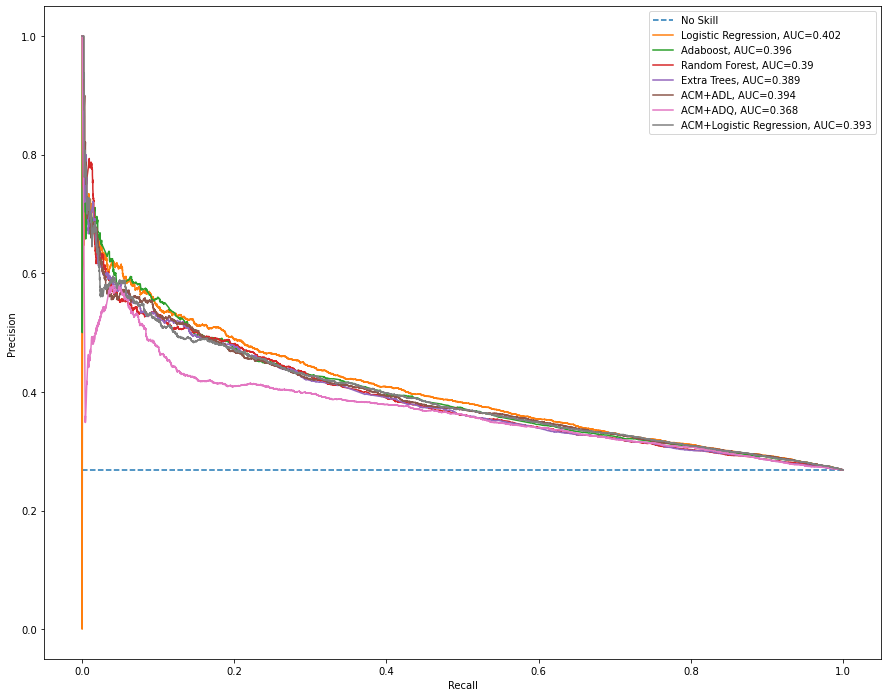

In [ ]:
change_test_Y_s = test_Y_s.copy()
change_test_Y_s[change_test_Y_s==1] = 1#0
change_test_Y_s[change_test_Y_s==2] = 0#1

change_test_Y_s_acm = test_Y_s_acm.copy()
change_test_Y_s_acm[change_test_Y_s_acm==1] = 1#0
change_test_Y_s_acm[change_test_Y_s_acm==2] = 0#1

plt.figure(figsize=(15,12))

no_skill = len(change_test_Y_s[change_test_Y_s==1]) / len(change_test_Y_s)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_LogisticRegression.predict_proba(test_X_s)[:,0] )
plt.plot(lr_recall, lr_precision, label = "Logistic Regression" + ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_AdaBoost.predict_proba(test_X_s)[:,0] )
plt.plot(lr_recall, lr_precision, label = "Adaboost" + ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_RandomForestClassifier.predict_proba(test_X_s)[:,0] )
plt.plot(lr_recall, lr_precision, label = "Random Forest" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_ExtraTreesClassifier.predict_proba(test_X_s)[:,0] )
plt.plot(lr_recall, lr_precision, label = "Extra Trees" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

############################################## ACM #####################################################################
lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s_acm, final_model_ADL.predict_proba(test_X_s_acm)[:,0] )
plt.plot(lr_recall, lr_precision, label = "ACM+ADL" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s_acm, final_model_ADQ.predict_proba(test_X_s_acm)[:,0] )
plt.plot(lr_recall, lr_precision, label = "ACM+ADQ" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s_acm, model_17_cw_ACM.predict_proba(test_X_s_acm)[:,0] )
plt.plot(lr_recall, lr_precision, label = "ACM+Logistic Regression" + ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))


#plt.ylim(no_skill,1)
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')

Text(0, 0.5, 'Precision')

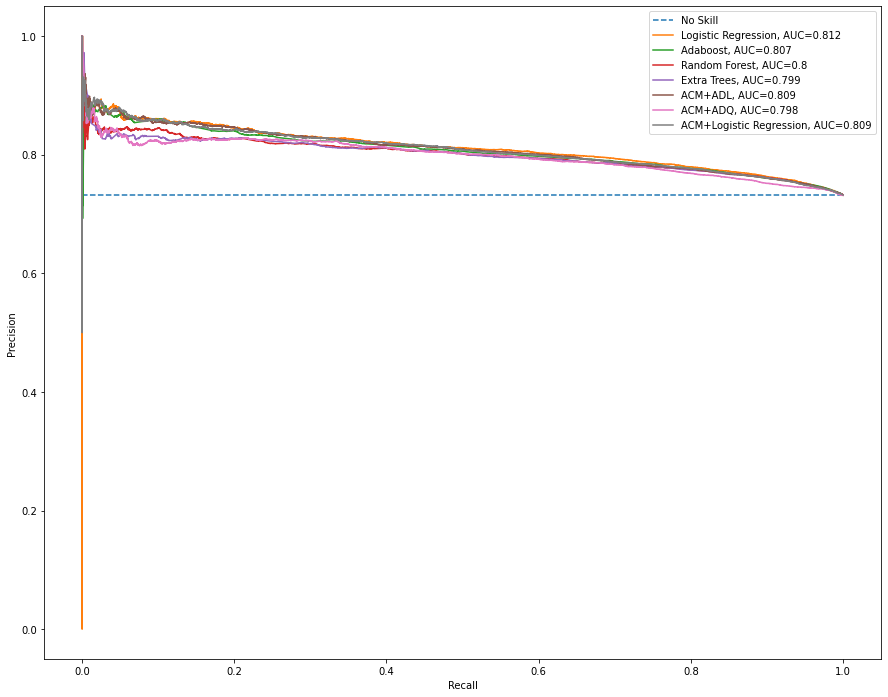

In [ ]:
change_test_Y_s = test_Y_s.copy()
change_test_Y_s[change_test_Y_s==1] = 0#0
change_test_Y_s[change_test_Y_s==2] = 1#1

change_test_Y_s_acm = test_Y_s_acm.copy()
change_test_Y_s_acm[change_test_Y_s_acm==1] = 0#0
change_test_Y_s_acm[change_test_Y_s_acm==2] = 1#1

plt.figure(figsize=(15,12))

no_skill = len(change_test_Y_s[change_test_Y_s==1]) / len(change_test_Y_s)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_LogisticRegression.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Logistic Regression" + ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_AdaBoost.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Adaboost" + ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_RandomForestClassifier.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Random Forest" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s, final_model_ExtraTreesClassifier.predict_proba(test_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Extra Trees" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

############################################## ACM #####################################################################
lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s_acm, final_model_ADL.predict_proba(test_X_s_acm)[:,1] )
plt.plot(lr_recall, lr_precision, label = "ACM+ADL" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s_acm, final_model_ADQ.predict_proba(test_X_s_acm)[:,1] )
plt.plot(lr_recall, lr_precision, label = "ACM+ADQ" +  ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))

lr_precision, lr_recall, _ = precision_recall_curve(change_test_Y_s_acm, model_17_cw_ACM.predict_proba(test_X_s_acm)[:,1] )
plt.plot(lr_recall, lr_precision, label = "ACM+Logistic Regression" + ", AUC=" +str(round(auc(lr_recall,lr_precision),3 )))


#plt.ylim(no_skill,1)
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
#######################################################################################################
#                                              COURBE GAINS
#######################################################################################################

In [ ]:
def courbe_gain(model, X_app, y_app, X_test, y_test): #train_X_s, train_Y_s, test_X_s, test_Y_s
    #lr = LogisticRegression(solver="liblinear")

    #modélisation sur les données d'apprentissage
    modele = model.fit(X_app,y_app)
    #calcul des probas d'affectation sur ech. test
    probas = model.predict_proba(X_test)
    #score de 'presence'
    score = probas[:,0] # [0.86238322 0.21334963 0.15895063 …]
    #transf. en 0/1 de Y_test
    pos = pd.get_dummies(y_test).values
    #on ne récupère que la 2è colonne (indice 1)
    pos = pos[:,1] # [ 1 0 0 1 0 0 1 1 …]
    #nombre total de positif
    npos = np.sum(pos) # 99 – il y a 99 ind. ‘’positifs’’ dans l’échantillon test

    #index pour tri selon le score croissant
    index = np.argsort(score) # [ 55 45 265 261 … 11 255 159]
    #inverser pour score décroissant – on s’intéresse à forte proba. en priorité
    index = index[::-1] # [ 159 255 11 … 261 265 45 55 ]
    #tri des individus (des valeurs 0/1)
    sort_pos = pos[index] # [ 1 1 1 1 1 0 1 1 …]
    #somme cumulée
    cpos = np.cumsum(sort_pos) # [ 1 2 3 4 5 5 6 7 … 99]
    #rappel
    rappel = cpos/npos # [ 1/99 2/99 3/99 4/99 5/99 5/99 6/99 7/99 … 99/99]
    #nb. obs ech.test
    n = y_test.shape[0] # 300, il y a 300 ind. dans l’éch. test
    #taille de cible – séquence de valeurs de 1 à 300 avec un pas de 1
    taille = np.arange(start=1,stop=n+1,step=1) # [1 2 3 4 5 … 300]
    #passer en proportion
    taille = taille / n # [ 1/300 2/300 3/300 … 300/300 ]

    #graphique avec matplotlib
    #titre et en-têtes
    plt.title('Courbe de gain')
    plt.xlabel('Taille de cible')
    plt.ylabel('Rappel')
    #limites en abscisse et ordonnée
    plt.xlim(0,1)
    plt.ylim(0,1)
    #astuce pour tracer la diagonale
    plt.scatter(taille,taille,marker='.',color='blue')
    #insertion du couple (taille, rappel)
    plt.scatter(taille,rappel,marker='.',color='red')


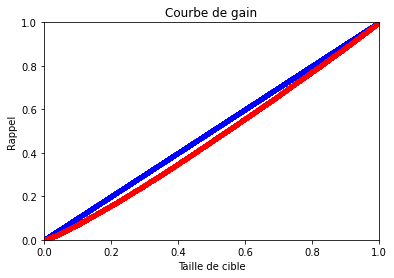

In [ ]:
courbe_gain(final_model_AdaBoost, train_X_s, train_Y_s, test_X_s, test_Y_s)

In [ ]:
import scikitplot as skplt
def courbe_lift(model, X_train, y_train, X_test, y_test):  #train_X_s, train_Y_s, test_X_s, test_Y_s
    model.fit(X_train, y_train)
    predicted_probas = model.predict_proba(X_test)
    # The magic happens here
    skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
    skplt.metrics.plot_lift_curve(y_test, predicted_probas)

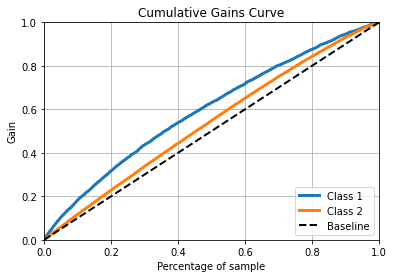

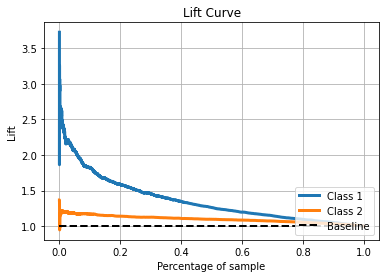

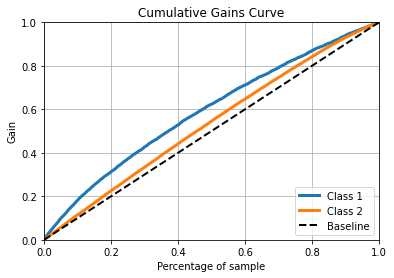

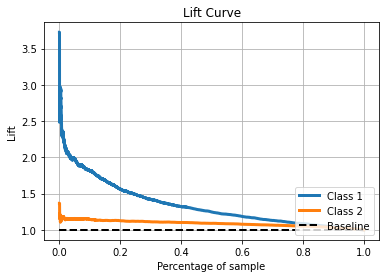

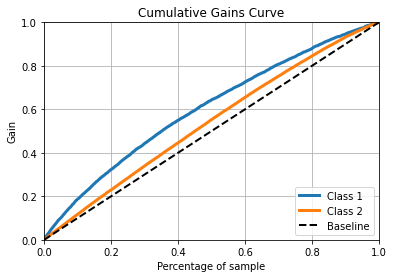

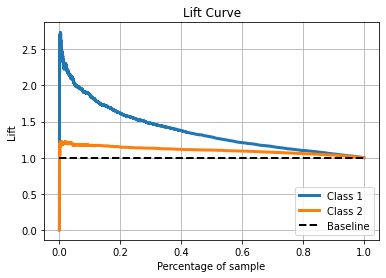

In [ ]:
courbe_lift(final_model_AdaBoost, train_X_s, train_Y_s, test_X_s, test_Y_s)
courbe_lift(final_model_RandomForestClassifier, train_X_s, train_Y_s, test_X_s, test_Y_s)
courbe_lift(final_model_LogisticRegression, train_X_s, train_Y_s, test_X_s, test_Y_s)

In [ ]:

################################################################################################################
#                                                       TEST
################################################################################################################


In [ ]:
final_model_LogisticRegression =("logistic", final_model_LogisticRegression)
final_model_ADL = ("ADL" , final_model_ADL)
final_model_ADQ =("ADQ", final_model_ADQ)

final_model_AdaBoost = ("Adaboost" , final_model_AdaBoost)
final_model_RandomForestClassifier =('Random', final_model_RandomForestClassifier) 
#final_model_ExtraTreesClassifier = ("Extra", ExtraTreesClassifier( criterion="entropy", max_depth=2, max_features=25, n_estimators=100 , class_weight="balanced", random_state=0) )
#final_model_DecisionTreeClassifier =("Tree" , DecisionTreeClassifier(random_state = 0, criterion="gini", class_weight = "balanced", max_depth = 2, max_features=13, min_samples_split=0.05 ))

models = [model_17_cw,final_model_ADL, final_model_ADQ, final_model_AdaBoost, final_model_RandomForestClassifier]


In [ ]:
model_Stacking = StackingClassifier(estimators=models, final_estimator=LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced") , cv=5)
#model_Stacking = StackingClassifier(estimators=models)

evaluation(model_Stacking, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


test set : 
[[2976 2355]
 [5157 9372]]
              precision    recall  f1-score   support

           1       0.37      0.56      0.44      5331
           2       0.80      0.65      0.71     14529

    accuracy                           0.62     19860
   macro avg       0.58      0.60      0.58     19860
weighted avg       0.68      0.62      0.64     19860

train set : 
[[11726  9671]
 [20054 37985]]
              precision    recall  f1-score   support

           1       0.37      0.55      0.44     21397
           2       0.80      0.65      0.72     58039

    accuracy                           0.63     79436
   macro avg       0.58      0.60      0.58     79436
weighted avg       0.68      0.63      0.64     79436

GRAPHIQUE NON DEMANDE


In [ ]:
table_test =vingtiles(model = model_Stacking, data_orig = data, affichage=True,
            save=False, path = "/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/Fichier_excel_vingtiles/train_test_Decision_Tree_Classifier.xlsx")

            IDENT     PROBA
58611  0010386243  0.290144
6279   0010253033  0.291283
7054   0010253826  0.292262
26897  0010344873  0.293753
35237  0010359756  0.295399
...           ...       ...
83536  0010503920  0.864540
60221  0010392936  0.865617
77220  0010412631  0.866549
82851  0010500476  0.866549
83624  0010504178  0.866549

[99296 rows x 2 columns]
0.862615    49
0.711806    28
0.655222    24
0.745673    19
0.766427    19
            ..
0.492067     1
0.375567     1
0.558121     1
0.409193     1
0.559614     1
Name: PROBA, Length: 96552, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA        TRANCHES CLASSE
58611  0010386243  0.290144  (0.289, 0.359]      1
6279   0010253033  0.291283  (0.289, 0.359]      1
7054   0010253826  0.292262  (0.289, 0.359]      1
26897  0010344873  0.293753  (0.289, 0.359]      1
35237  0010359756  0.295399  (0.289, 0.359]      1
...           ...       ...             ...    ...
83536  0010503920  0.864540  (0.686, 0.867]     20
60221  0010392936  0.865617  (0.686, 0.867]     20
77220  0010412631  0.866549  (0.686, 0.867]     20
82851  0010500476  0.866549  (0.686, 0.867]     20
83624  0010504178  0.866549  (0.686, 0.867]     20

[99296 rows x 4 columns]
Top_mon            1     2  TOTAL
TRANCHES                         
(0.289, 0.359]   637  4328   4965
(0.359, 0.377]   732  4233   4965
(0.377, 0.392]   826  4139   4965
(0.392, 0.405]   906  4059   4965
(0.405, 0.417]   975  3989   4964
(0.417, 0.429]   945  4020   4965
(0.429, 0.441]  1038  3927   4965
(0.441, 0.452]  1163  3802   4965
(0.452, 0.464]  1107  

In [ ]:
model_17_cw =("logistic", final_model_LogisticRegression)
final_model_AdaBoost = ("Adaboost" , final_model_AdaBoost)
final_model_RandomForestClassifier =('Random', final_model_RandomForestClassifier) 

models = [model_17_cw, final_model_AdaBoost, final_model_RandomForestClassifier]

In [ ]:
model_Stacking = StackingClassifier(estimators=models, final_estimator=LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced") , cv=5)
evaluation(model_Stacking, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


ValueError: ignored

In [ ]:
model_17_cw =("logistic", LogisticRegression(random_state =0, solver="newton-cg", max_iter= 10000) )
final_model_AdaBoost = ("Adaboost" , AdaBoostClassifier(base_estimator = DecisionTreeClassifier( criterion="entropy",max_depth=5),n_estimators = 50 , random_state=0) )
final_model_RandomForestClassifier =('Random', RandomForestClassifier( criterion="entropy", max_depth=5, max_features=7, n_estimators = 100, random_state=0) ) 

models = [model_17_cw, final_model_AdaBoost, final_model_RandomForestClassifier]

In [ ]:
model_Stacking = StackingClassifier(estimators=models, final_estimator=LogisticRegression(class_weight="balanced") , cv=5)
evaluation(model_Stacking, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


test set : 
[[2919 2412]
 [4998 9531]]
              precision    recall  f1-score   support

           1       0.37      0.55      0.44      5331
           2       0.80      0.66      0.72     14529

    accuracy                           0.63     19860
   macro avg       0.58      0.60      0.58     19860
weighted avg       0.68      0.63      0.65     19860

train set : 
[[11530  9867]
 [19462 38577]]
              precision    recall  f1-score   support

           1       0.37      0.54      0.44     21397
           2       0.80      0.66      0.72     58039

    accuracy                           0.63     79436
   macro avg       0.58      0.60      0.58     79436
weighted avg       0.68      0.63      0.65     79436

GRAPHIQUE NON DEMANDE


In [ ]:
table_test =vingtiles(model = model_Stacking, data_orig = data, affichage=True,
            save=False, path = "/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/Fichier_excel_vingtiles/train_test_Decision_Tree_Classifier.xlsx")

            IDENT     PROBA
58611  0010386243  0.256502
35237  0010359756  0.263135
11693  0010258609  0.269333
6889   0010253661  0.269602
35981  0010360539  0.270694
...           ...       ...
2111   0010027396  0.936747
60221  0010392936  0.936934
77220  0010412631  0.937483
83624  0010504178  0.937483
82851  0010500476  0.937483

[99296 rows x 2 columns]
0.934046    49
0.724492    28
0.646201    24
0.802214    19
0.738922    19
            ..
0.557587     1
0.447740     1
0.397696     1
0.403591     1
0.428746     1
Name: PROBA, Length: 96552, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA        TRANCHES CLASSE
58611  0010386243  0.256502   (0.256, 0.34]      1
35237  0010359756  0.263135   (0.256, 0.34]      1
11693  0010258609  0.269333   (0.256, 0.34]      1
6889   0010253661  0.269602   (0.256, 0.34]      1
35981  0010360539  0.270694   (0.256, 0.34]      1
...           ...       ...             ...    ...
2111   0010027396  0.936747  (0.713, 0.937]     20
60221  0010392936  0.936934  (0.713, 0.937]     20
77220  0010412631  0.937483  (0.713, 0.937]     20
83624  0010504178  0.937483  (0.713, 0.937]     20
82851  0010500476  0.937483  (0.713, 0.937]     20

[99296 rows x 4 columns]
Top_mon            1     2  TOTAL
TRANCHES                         
(0.256, 0.34]    615  4350   4965
(0.34, 0.359]    734  4231   4965
(0.359, 0.374]   835  4130   4965
(0.374, 0.388]   903  4062   4965
(0.388, 0.402]   970  3994   4964
(0.402, 0.415]   962  4003   4965
(0.415, 0.428]  1026  3939   4965
(0.428, 0.442]  1131  3834   4965
(0.442, 0.455]  1141  

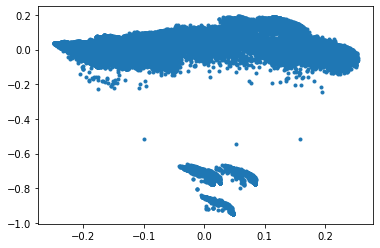

In [73]:
plt.plot(coord[:,0], coord[:,1], '.')

In [74]:
table_temp_left

,IDENT,left
25896,0010404003,20
43657,0010254123,20
48674,0010412546,20
51659,0010396532,20
52822,0010255470,20
...,...,...
99211,0010364438,20
99212,0010250860,20
99213,0010534199,20
99217,0010380449,20


array([[ 0.2064147 , -0.07279156,  0.2601856 , ..., -0.01035425,
         0.00183355, -0.04774655],
       [ 0.17225554,  0.00283344,  0.01895604, ...,  0.00128914,
         0.02621258,  0.0299656 ],
       [-0.13678737, -0.03003332,  0.09754335, ..., -0.02352352,
         0.05358539,  0.05241703],
       ...,
       [ 0.20406872,  0.01462273,  0.11417996, ...,  0.09128935,
        -0.22694841,  0.27482594],
       [ 0.20342261,  0.01100316,  0.11568135, ...,  0.03093554,
        -0.01601142,  0.1280666 ],
       [-0.21745278,  0.02189282, -0.08379142, ..., -0.04092873,
         0.00835031, -0.02117925]])

In [107]:
temp_test_test = data_coord_nan.copy() 


temp_test_test_left = pd.merge(temp_test_test, table_temp_left, how= "left")

#vérification 
print(temp_test_test_left["left"].value_counts(dropna=False))

temp_test_test_left["left"] = temp_test_test_left["left"].fillna(0)
temp_test_test_left["left"] = temp_test_test_left["left"].astype(int) 
#vérification 
print(temp_test_test_left["left"].value_counts(dropna=False))


temp_test_test_right= pd.merge(table_temp_right, temp_test_test, how= "right")

#vérification 
print(temp_test_test_right["right"].value_counts(dropna=False))

temp_test_test_right["right"] = temp_test_test_right["right"].fillna(0)
temp_test_test_right["right"] = temp_test_test_right["right"].astype(int) 
#vérification 
print(temp_test_test_right["right"].value_counts(dropna=False))


NaN     96662
20.0     2634
Name: left, dtype: int64
0     96662
20     2634
Name: left, dtype: int64
NaN     96633
20.0     2663
Name: right, dtype: int64
0     96633
20     2663
Name: right, dtype: int64


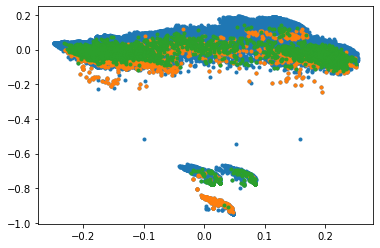

In [118]:
plt.plot(coord_sans_nan[:,0],coord_sans_nan[:,1], "." )
plt.plot(coord_sans_nan[temp_test_test_left["left"]==20, 0], coord_sans_nan[temp_test_test_left["left"]==20, 1], ".")
plt.plot(coord_sans_nan[temp_test_test_right["right"]==20, 0], coord_sans_nan[temp_test_test_right["right"]==20, 1], ".")

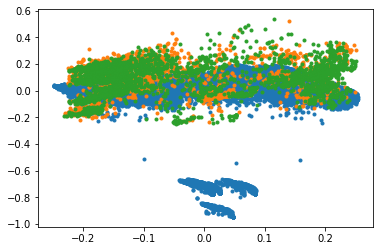

In [109]:
§plt.plot(coord_sans_nan[:,0],coord_sans_nan[:,1], "." )
plt.plot(coord_sans_nan[temp_test_test_left["left"]==20, 0], coord_sans_nan[temp_test_test_left["left"]==20, 2], ".")
plt.plot(coord_sans_nan[temp_test_test_right["right"]==20, 0], coord_sans_nan[temp_test_test_right["right"]==20, 2], ".")

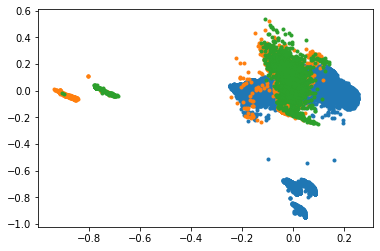

In [110]:
plt.plot(coord_sans_nan[:,0],coord_sans_nan[:,1], "." )
plt.plot(coord_sans_nan[temp_test_test_left["left"]==20, 1], coord_sans_nan[temp_test_test_left["left"]==20, 2], ".")
plt.plot(coord_sans_nan[temp_test_test_right["right"]==20, 1], coord_sans_nan[temp_test_test_right["right"]==20, 2], ".")

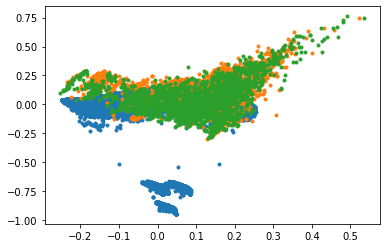

In [125]:
plt.plot(coord_sans_nan[:,0],coord_sans_nan[:,1], "." )
plt.plot(coord_sans_nan[temp_test_test_left["left"]==20, 2], coord_sans_nan[temp_test_test_left["left"]==20, 4], ".")
plt.plot(coord_sans_nan[temp_test_test_right["right"]==20, 2], coord_sans_nan[temp_test_test_right["right"]==20, 4], ".")